# Project 2 : Ames Housing Data and Kaggle Challenge

## Problem Statement
Housing agent use their local housing market knowledge to bridge the information gap between potential buyers and sellers and help them to reach the final agreeable price. Top-earning housing agents have one thing in common: They know their local housing market very well. As an employee of a new start up housing agency company located in Ames, a fully understand market conditions will help us advice better to our clients, position clients’ housing correctly against the competitions, and keep in check if clients’ expectations is reasonalbe. The Business development manager would like us to find out below:

1) Identifying the important influence factors for the housing price

2) Developing an model to estimate sales price based on features.

In this project, we will uses the Ames housing data available on Kaggle to address above. Further we will evaluate and optimize our model by a few validation/optimization techniques, eg k-fold cross validation, train/test split validation, regression metrics comparison. we will access our model's accuracy, precision and its ability to generalize the new data to provide our business representatives and their clients possible market recommendations.

#### Target Audience

- Primary stakeholders: semi-tech business manager/representative worked in the company
- Secondary stakeholders: housing buyers and sellers

## Data  Cleaning and EDA

In [1]:
## Importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet, ElasticNetCV
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### 1. Read In Train & Test  Data

Read in the [train.csv](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data) and [test.csv](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data) files and assign them to appropriately named pandas dataframes.

In [2]:
#read the csv file from relative path
traindata=pd.read_csv(r'C:\Users\User\materials\project_2\datasets\train.csv')
testdata=pd.read_csv(r"C:\Users\User\materials\project_2\datasets\test.csv")

#### 2. Display Data

In [3]:
#show the first 10 row for dataframe
traindata.head(10)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   109  533352170           60        RL           NaN     13517   Pave   
1   544  531379050           60        RL          43.0     11492   Pave   
2   153  535304180           20        RL          68.0      7922   Pave   
3   318  916386060           60        RL          73.0      9802   Pave   
4   255  906425045           50        RL          82.0     14235   Pave   
5   138  535126040           20        RL         137.0     16492   Pave   
6  2827  908186070          180        RM          35.0      3675   Pave   
7   145  535154050           20        RL           NaN     12160   Pave   
8  1942  535353130           20        RL           NaN     15783   Pave   
9  1956  535426130           60        RL          70.0     11606   Pave   

  Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl  ...            0         0     NaN    NaN   
1   NaN       IR1          Lvl  ...            0         0     NaN    NaN   
2   NaN       Reg          Lvl  ...            0         0     NaN    NaN   
3   NaN       Reg          Lvl  ...            0         0     NaN    NaN   
4   NaN       IR1          Lvl  ...            0         0     NaN    NaN   
5   NaN       IR1          Lvl  ...            0         0     NaN    NaN   
6   NaN       Reg          Lvl  ...            0         0     NaN    NaN   
7   NaN       IR1          Lvl  ...            0         0     NaN  MnPrv   
8   NaN       Reg          Lvl  ...            0         0     NaN  MnPrv   
9   NaN       IR1          HLS  ...            0         0     NaN    NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  
5          NaN        0       6    2010        WD      190000  
6          NaN        0       6    2006        New     140000  
7          NaN        0       5    2010        COD     142000  
8         Shed      400       6    2007        WD      112500  
9          NaN        0       9    2007        WD      135000  

[10 rows x 81 columns]

In [4]:
#show the first 10 row for dataframe
testdata.head(10)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   
5   333  923228370          160        RM          21.0      1890   Pave   
6  1327  902427150           20        RM          52.0      8516   Pave   
7   858  907202130           20        RL           NaN      9286   Pave   
8    95  533208090          160        FV          39.0      3515   Pave   
9  1568  914476010           20        RL          75.0     10125   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   
5   NaN       Reg          Lvl  ...          0            0         0     NaN   
6   NaN       Reg          Lvl  ...          0            0         0     NaN   
7   NaN       IR1          Lvl  ...          0            0         0     NaN   
8  Pave       Reg          Lvl  ...          0            0         0     NaN   
9   NaN       Reg          Lvl  ...          0            0         0     NaN   

   Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0    NaN          NaN        0       4     2006        WD   
1    NaN          NaN        0       8     2006        WD   
2    NaN          NaN        0       9     2006        New  
3    NaN          NaN        0       7     2007        WD   
4    NaN          NaN        0       7     2009        WD   
5    NaN          NaN        0       6     2010        WD   
6    NaN          NaN        0       5     2008        WD   
7    NaN          NaN        0      10     2009        WD   
8    NaN          NaN        0       1     2010        WD   
9  MnPrv          NaN        0       2     2008        WD   

[10 rows x 80 columns]

These two sets of data have many columns with a lot of missing values

#### 2. Check the  Data Size

In [5]:
#check the data size
traindata.shape

(2051, 81)

In [6]:
#check the data size
testdata.shape

(879, 80)

#### 3. Check the miss value

In [7]:
#check the total count for missing value for the columns contains missing value
traindata.loc[:, traindata.isna().any()].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [8]:
#check the total count for missing value for the columns contains missing value
testdata.loc[:, testdata.isna().any()].isnull().sum()

Lot Frontage      160
Alley             821
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           875
Fence             707
Misc Feature      838
dtype: int64

#### There are high numbers  of  missing value for column "Fence","Pool QC","Misc Feature","Alley" and "Fireplace Qu", we are not sure if we should remove those columns. 

#### 4. Drop unnecessary columns
Column"Id" and "PID" is the identification Number and obeservation Number. it is not related to the salesprice at all. I dropped these two columns

In [9]:
#drop the unnecessary columns in traindata set
traindata=traindata.drop(["Id","PID"],axis=1)

In [10]:
#drop the unnecessary columns in testdata set
testdata=testdata.drop(["Id","PID"],axis=1)

#### 5. Check the datatype

In [11]:
#Check the datatype for first 20 columns from traindata
traindata[traindata.columns[:20]].dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
dtype: object

In [12]:
#Check the datatype for first 20 columns from testdata
testdata[testdata.columns[:20]].dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
dtype: object

In [13]:
#Check the datatype for 20 to 40 columns from traindata
traindata[traindata.columns[20:40]].dtypes

Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Heating            object
Heating QC         object
dtype: object

In [14]:
#Check the datatype for 20 to 40 columns from traindata
testdata[testdata.columns[20:40]].dtypes

Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1        int64
BsmtFin Type 2     object
BsmtFin SF 2        int64
Bsmt Unf SF         int64
Total Bsmt SF       int64
Heating            object
Heating QC         object
dtype: object

In [15]:
#check the datatype for 40 to 60 columns for traindata
traindata[traindata.columns[40:60]].dtypes

Central Air         object
Electrical          object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Type         object
Garage Yr Blt      float64
Garage Finish       object
dtype: object

In [16]:
#check the datatype for 40 to 60 columns for testdata
testdata[testdata.columns[40:60]].dtypes

Central Air         object
Electrical          object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath       int64
Bsmt Half Bath       int64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Type         object
Garage Yr Blt      float64
Garage Finish       object
dtype: object

In [17]:
#check the datatype for 60 +columns in traindata
traindata[traindata.columns[60:]].dtypes

Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
Paved Drive        object
Wood Deck SF        int64
Open Porch SF       int64
Enclosed Porch      int64
3Ssn Porch          int64
Screen Porch        int64
Pool Area           int64
Pool QC            object
Fence              object
Misc Feature       object
Misc Val            int64
Mo Sold             int64
Yr Sold             int64
Sale Type          object
SalePrice           int64
dtype: object

In [18]:
#check the datatype for 60 +columns in testdata
testdata[testdata.columns[60:]].dtypes

Garage Cars        int64
Garage Area        int64
Garage Qual       object
Garage Cond       object
Paved Drive       object
Wood Deck SF       int64
Open Porch SF      int64
Enclosed Porch     int64
3Ssn Porch         int64
Screen Porch       int64
Pool Area          int64
Pool QC           object
Fence             object
Misc Feature      object
Misc Val           int64
Mo Sold            int64
Yr Sold            int64
Sale Type         object
dtype: object

The data types are examined. They are all looks good for further analysis and modeling

#### 6. Describe the summary statistics for numberic columns

##### A mean and median sale price of 181469 and 162500 USD respectively, 50% house in AMES with the Sales price between 130000 to 214000 USD, the distribution of Sale price is positive skewed.

In [19]:
#display the the summary statistics
traindata.describe().transpose()

count           mean           std      min       25%  \
MS SubClass      2051.0      57.008776     42.824223     20.0      20.0   
Lot Frontage     1721.0      69.055200     23.260653     21.0      58.0   
Lot Area         2051.0   10065.208191   6742.488909   1300.0    7500.0   
Overall Qual     2051.0       6.112140      1.426271      1.0       5.0   
Overall Cond     2051.0       5.562165      1.104497      1.0       5.0   
Year Built       2051.0    1971.708922     30.177889   1872.0    1953.5   
Year Remod/Add   2051.0    1984.190151     21.036250   1950.0    1964.5   
Mas Vnr Area     2029.0      99.695909    174.963129      0.0       0.0   
BsmtFin SF 1     2050.0     442.300488    461.204124      0.0       0.0   
BsmtFin SF 2     2050.0      47.959024    165.000901      0.0       0.0   
Bsmt Unf SF      2050.0     567.728293    444.954786      0.0     220.0   
Total Bsmt SF    2050.0    1057.987805    449.410704      0.0     793.0   
1st Flr SF       2051.0    1164.488055    396.446923    334.0     879.5   
2nd Flr SF       2051.0     329.329108    425.671046      0.0       0.0   
Low Qual Fin SF  2051.0       5.512921     51.068870      0.0       0.0   
Gr Liv Area      2051.0    1499.330083    500.447829    334.0    1129.0   
Bsmt Full Bath   2049.0       0.427526      0.522673      0.0       0.0   
Bsmt Half Bath   2049.0       0.063446      0.251705      0.0       0.0   
Full Bath        2051.0       1.577279      0.549279      0.0       1.0   
Half Bath        2051.0       0.371039      0.501043      0.0       0.0   
Bedroom AbvGr    2051.0       2.843491      0.826618      0.0       2.0   
Kitchen AbvGr    2051.0       1.042906      0.209790      0.0       1.0   
TotRms AbvGrd    2051.0       6.435885      1.560225      2.0       5.0   
Fireplaces       2051.0       0.590931      0.638516      0.0       0.0   
Garage Yr Blt    1937.0    1978.707796     25.441094   1895.0    1961.0   
Garage Cars      2050.0       1.776585      0.764537      0.0       1.0   
Garage Area      2050.0     473.671707    215.934561      0.0     319.0   
Wood Deck SF     2051.0      93.833740    128.549416      0.0       0.0   
Open Porch SF    2051.0      47.556802     66.747241      0.0       0.0   
Enclosed Porch   2051.0      22.571916     59.845110      0.0       0.0   
3Ssn Porch       2051.0       2.591419     25.229615      0.0       0.0   
Screen Porch     2051.0      16.511458     57.374204      0.0       0.0   
Pool Area        2051.0       2.397855     37.782570      0.0       0.0   
Misc Val         2051.0      51.574354    573.393985      0.0       0.0   
Mo Sold          2051.0       6.219893      2.744736      1.0       4.0   
Yr Sold          2051.0    2007.775719      1.312014   2006.0    2007.0   
SalePrice        2051.0  181469.701609  79258.659352  12789.0  129825.0   

                      50%        75%       max  
MS SubClass          50.0      70.00     190.0  
Lot Frontage         68.0      80.00     313.0  
Lot Area           9430.0   11513.50  159000.0  
Overall Qual          6.0       7.00      10.0  
Overall Cond          5.0       6.00       9.0  
Year Built         1974.0    2001.00    2010.0  
Year Remod/Add     1993.0    2004.00    2010.0  
Mas Vnr Area          0.0     161.00    1600.0  
BsmtFin SF 1        368.0     733.75    5644.0  
BsmtFin SF 2          0.0       0.00    1474.0  
Bsmt Unf SF         474.5     811.00    2336.0  
Total Bsmt SF       994.5    1318.75    6110.0  
1st Flr SF         1093.0    1405.00    5095.0  
2nd Flr SF            0.0     692.50    1862.0  
Low Qual Fin SF       0.0       0.00    1064.0  
Gr Liv Area        1444.0    1728.50    5642.0  
Bsmt Full Bath        0.0       1.00       3.0  
Bsmt Half Bath        0.0       0.00       2.0  
Full Bath             2.0       2.00       4.0  
Half Bath             0.0       1.00       2.0  
Bedroom AbvGr         3.0       3.00       8.0  
Kitchen AbvGr         1.0       1.00       3.0  
TotRms AbvGrd         6.0       7.00    

In [20]:
#display the the summary statistics
testdata.describe().transpose()

count          mean           std     min     25%     50%  \
MS SubClass      879.0     58.270762     42.211389    20.0    20.0    50.0   
Lot Frontage     719.0     69.630042     23.625372    21.0    59.0    68.0   
Lot Area         879.0  10340.920364  10047.335167  1477.0  7298.5  9453.0   
Overall Qual     879.0      6.054608      1.374756     2.0     5.0     6.0   
Overall Cond     879.0      5.565415      1.128422     1.0     5.0     5.0   
Year Built       879.0   1970.533561     30.403527  1880.0  1954.0  1972.0   
Year Remod/Add   879.0   1984.444824     20.454546  1950.0  1967.0  1992.0   
Mas Vnr Area     878.0    106.982916    188.356829     0.0     0.0     0.0   
BsmtFin SF 1     879.0    443.397042    442.480223     0.0     0.0   374.0   
BsmtFin SF 2     879.0     53.835040    178.539854     0.0     0.0     0.0   
Bsmt Unf SF      879.0    539.518771    426.082726     0.0   216.0   453.0   
Total Bsmt SF    879.0   1036.750853    419.258428     0.0   790.0   975.0   
1st Flr SF       879.0   1148.053470    381.022337   407.0   864.0  1064.0   
2nd Flr SF       879.0    349.751991    434.595133     0.0     0.0     0.0   
Low Qual Fin SF  879.0      2.725825     32.554124     0.0     0.0     0.0   
Gr Liv Area      879.0   1500.531286    517.413260   407.0  1114.0  1436.0   
Bsmt Full Bath   879.0      0.440273      0.529983     0.0     0.0     0.0   
Bsmt Half Bath   879.0      0.055745      0.229560     0.0     0.0     0.0   
Full Bath        879.0      1.541524      0.560908     0.0     1.0     2.0   
Half Bath        879.0      0.399317      0.506045     0.0     0.0     0.0   
Bedroom AbvGr    879.0      2.879408      0.830249     0.0     2.0     3.0   
Kitchen AbvGr    879.0      1.047782      0.223844     0.0     1.0     1.0   
TotRms AbvGrd    879.0      6.459613      1.603071     3.0     5.0     6.0   
Fireplaces       879.0      0.618885      0.669313     0.0     0.0     1.0   
Garage Yr Blt    834.0   1976.796163     25.695683  1900.0  1960.0  1978.0   
Garage Cars      879.0      1.744027      0.751162     0.0     1.0     2.0   
Garage Area      879.0    470.832765    213.070155     0.0   323.0   473.0   
Wood Deck SF     879.0     93.560865    121.174306     0.0     0.0     0.0   
Open Porch SF    879.0     47.478953     69.209179     0.0     0.0    27.0   
Enclosed Porch   879.0     24.037543     73.212237     0.0     0.0     0.0   
3Ssn Porch       879.0      2.594994     24.948416     0.0     0.0     0.0   
Screen Porch     879.0     14.813424     52.975963     0.0     0.0     0.0   
Pool Area        879.0      1.882821     29.899698     0.0     0.0     0.0   
Misc Val         879.0     48.443686    549.858353     0.0     0.0     0.0   
Mo Sold          879.0      6.207053      2.644097     1.0     5.0     6.0   
Yr Sold          879.0   2007.824801      1.327396  2006.0  2007.0  2008.0   

                     75%       max  
MS SubClass         70.0     190.0  
Lot Frontage        80.0     182.0  
Lot Area         11606.5  215245.0  
Overall Qual         7.0      10.0  
Overall Cond         6.0       9.0  
Year Built        2000.0    2010.0  
Year Remod/Add    2003.0    2010.0  
Mas Vnr Area       173.5    1378.0  
BsmtFin SF 1       735.5    2288.0  
BsmtFin SF 2         0.0    1526.0  
Bsmt Unf SF        781.5    2046.0  
Total Bsmt SF     1248.0    3138.0  
1st Flr SF        1358.0    3138.0  
2nd Flr SF         720.0    2065.0  
Low Qual Fin SF      0.0     481.0  
Gr Liv Area       1781.0    4676.0  
Bsmt Full Bath       1.0       2.0  
Bsmt Half Bath       0.0       1.0  
Full Bath            2.0       4.0  
Half Bath            1.0       2.0  
Bedroom AbvGr        3.0       6.0  
Kitchen AbvGr        1.0       3.0  
TotRms AbvGrd        7.0      12.0  
Fireplaces           1.0       3.0  
Garage Yr Blt     2001.0    2010.0  
Garage Cars          2.0       4.0  
Garage Area        576.0    1488.0  
Wood Deck SF       171.0     690.0  
Open Porch SF       70.0     742.0  
Enclosed Porch      

#### 7. Split the columns to numberic and catagorical columns

##### Steps for traindata

In [21]:
#get an list contain all numberic columns
train_numberic_column=traindata._get_numeric_data().columns
#get an list of all columns name
train_columns=traindata.columns

In [22]:
#write an loop to get a list of catergory columns
train_category_columns=[]
for x in train_columns:
    if x not in train_numberic_column:
        train_category_columns.append(x)

##### Steps for testdata

In [23]:
#get an list contain all numberic columns
test_numberic_column=testdata._get_numeric_data().columns
#get an list of all columns name
test_columns=testdata.columns

In [24]:
#write an loop to get a list of catergory columns
test_category_columns=[]
for x in test_columns:
    if x not in test_numberic_column:
        test_category_columns.append(x)

#### 9. Fill the Nan value in the catergory data
#### After compared with defination in the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) All the catagories Nan values are falled into NA Type of this catagories. Thus I change all the nan values with "NA"

In [25]:
#replace the nan value with "nan" in category data
traindata[train_category_columns]=traindata[train_category_columns].replace(np.nan, "NA")

In [26]:
#replace the nan value with "nan" in category data
testdata[test_category_columns]=testdata[test_category_columns].replace(np.nan, "NA")

#### 10. Fill the Nan value in the Numberic data

##### Explore the correlation
##### The feature with highest correation again sale price is the rate of the overall material and finish of the house. The rest of the important features include built year, mas vnr Area, Above grade (ground) living area square feet, Total basement Area, Garage Area.

Text(232.0, 0.5, 'Columns')

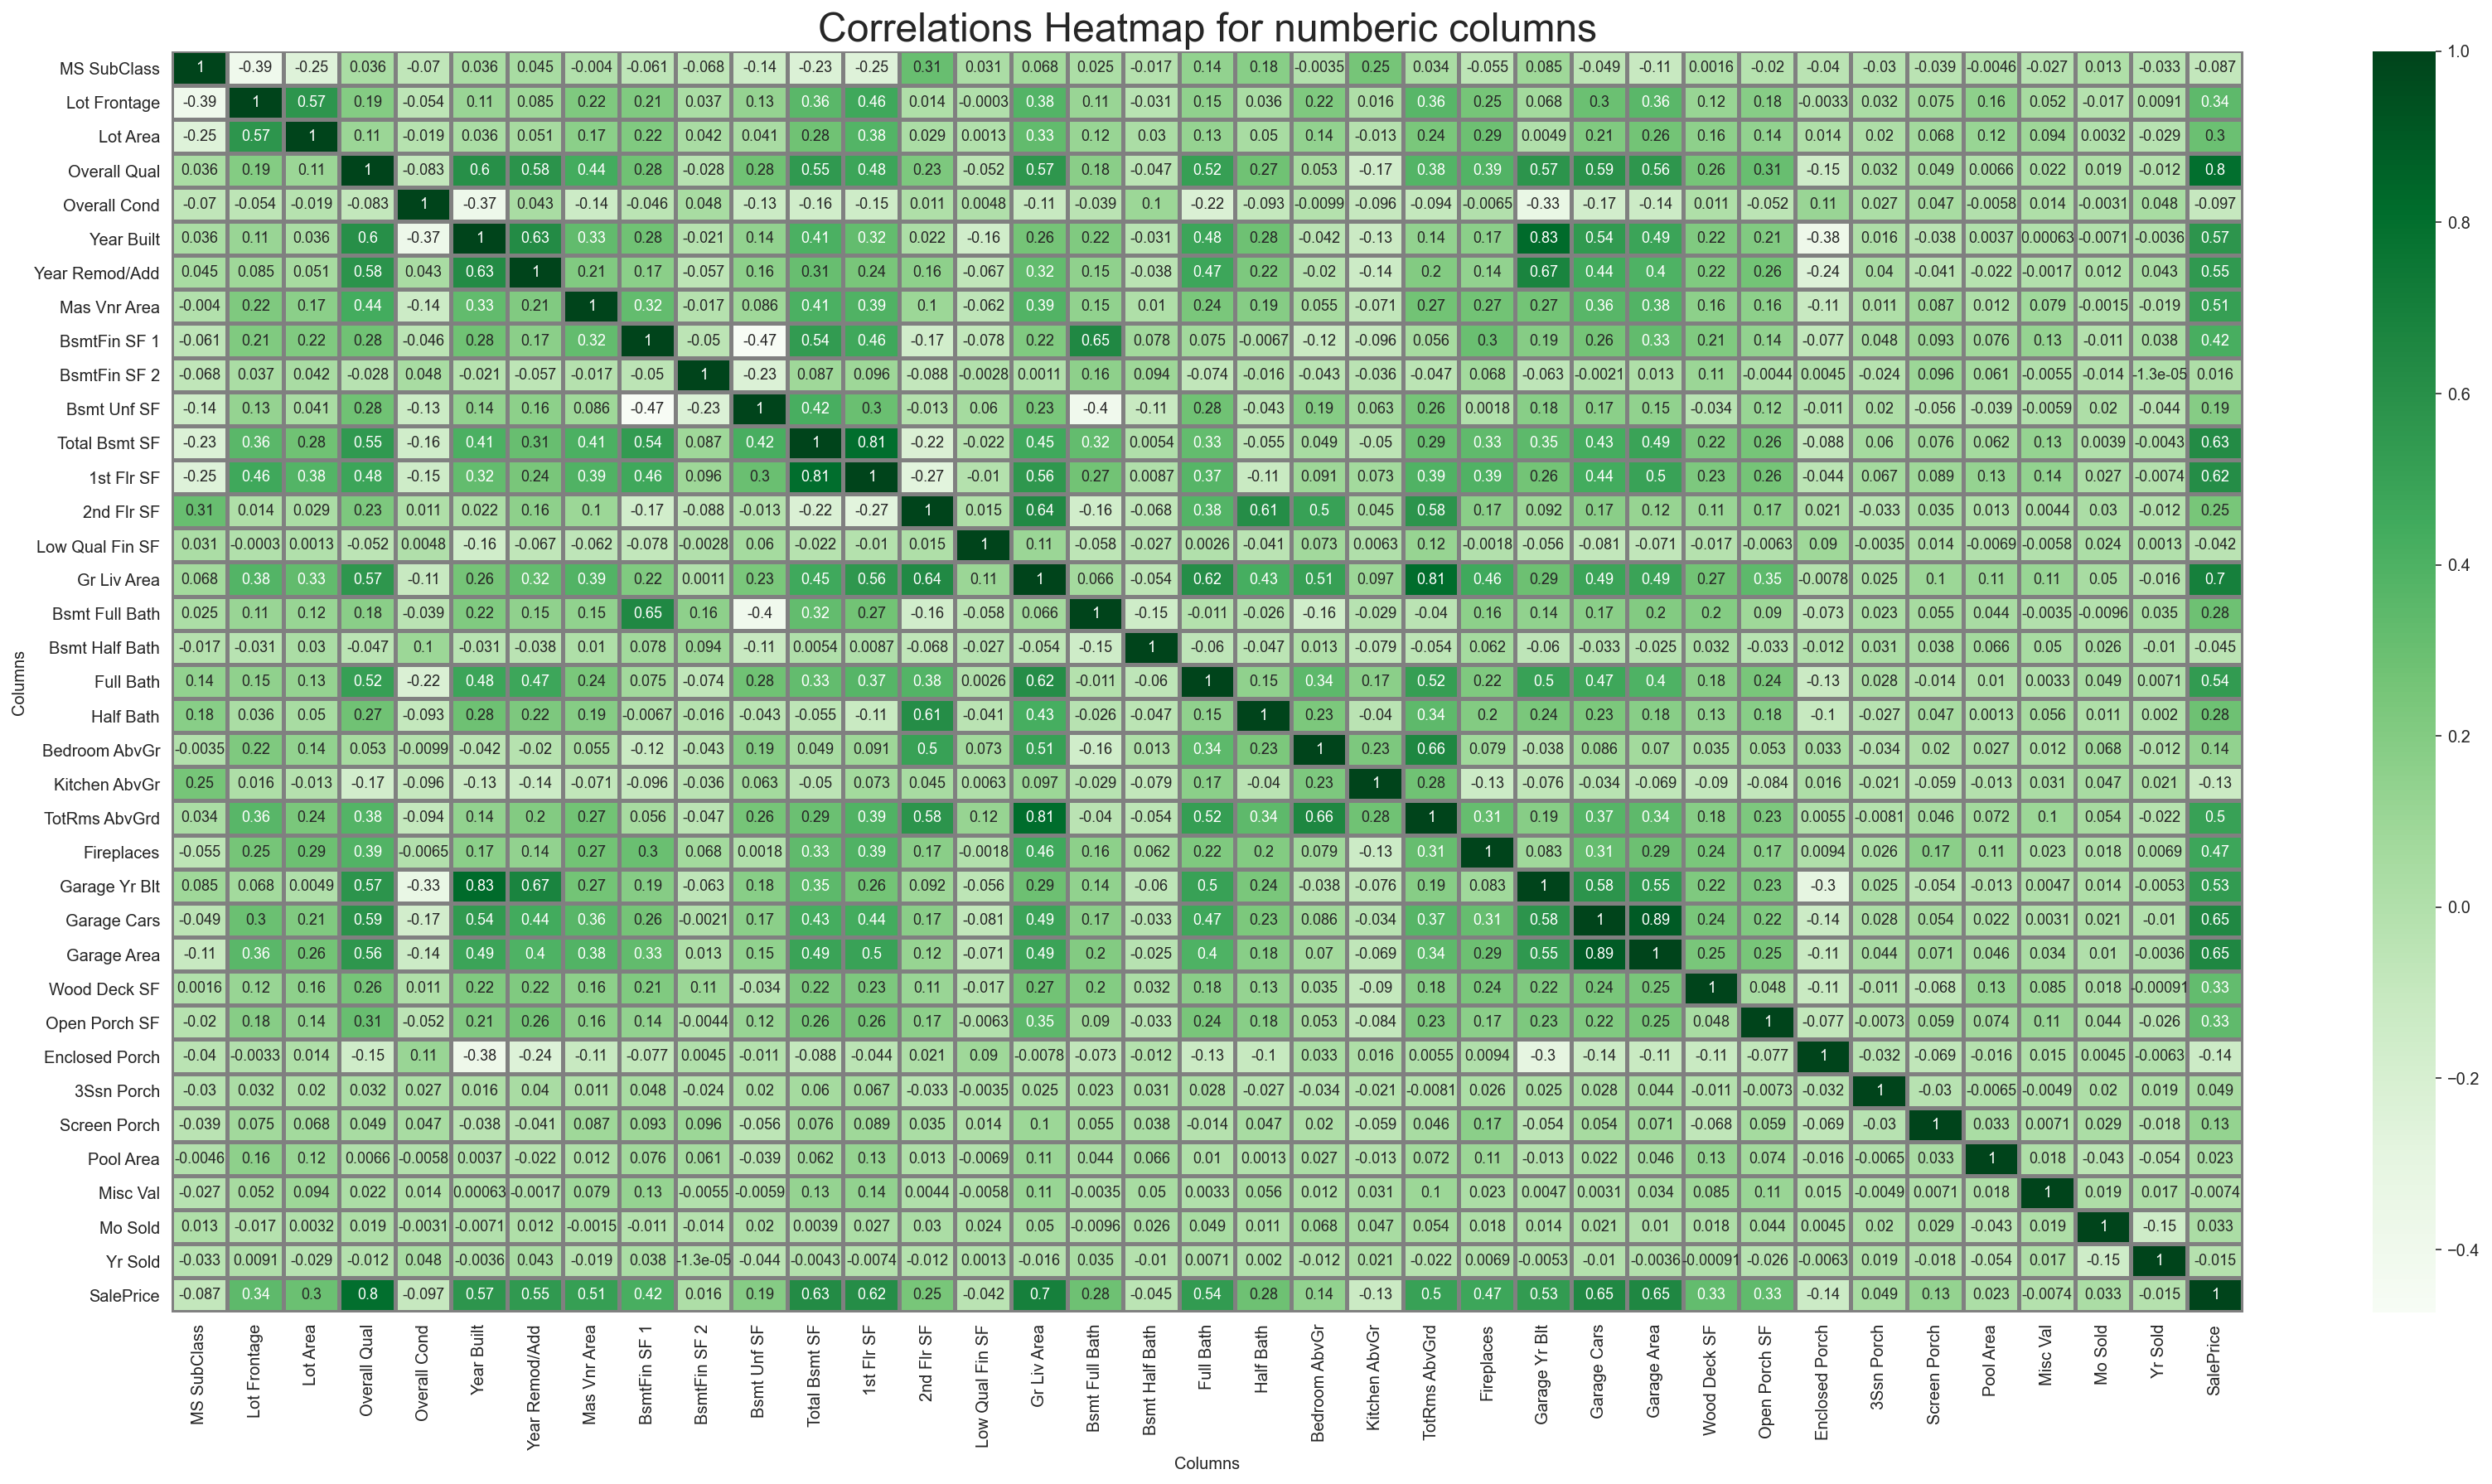

In [27]:
#set the figsize
plt.figure(figsize=(28, 14))
#unpack this tuple into the variables
ax = plt.axes()
#plot the heatmap
sns.heatmap(traindata.corr(),cmap="Greens",annot=True, annot_kws={"size": 9},linewidths=2, linecolor='Grey'); 
#set title
ax.set_title('Correlations Heatmap for numberic columns', fontsize=24)
#set xlabel
ax.set_xlabel('Columns')
#set ylabel
ax.set_ylabel('Columns')

#### Feature engineering:  Manually drop collinear features"Garage Yr Blt" because its value is highly correlated with the "Year Built" and whether there is a Garage, and it consists quite a number of  Nan values.

In [28]:
#drop the collinear columns in traindata set
traindata=traindata.drop(["Garage Yr Blt"],axis=1)

In [29]:
#drop the collinear columns in traindata set
testdata=testdata.drop(["Garage Yr Blt"],axis=1)

##### Replace the Nan value in "Garage Cars","Garage Area","Mas Vnr Area","BsmtFin SF 1","BsmtFin SF 2","Bsmt Unf SF","Total Bsmt SF", "Bsmt Full Bath","Bsmt Half Bath" with 0 as the missing values due to there are NA type in those catagories, eg, there is no Basement, or Garage

In [30]:
#replace the nan value with "nan" with 0
traindata[["Garage Cars","Garage Area","Mas Vnr Area","BsmtFin SF 1","BsmtFin SF 2","Bsmt Unf SF","Total Bsmt SF",\
           "Bsmt Full Bath","Bsmt Half Bath"]]=traindata[["Garage Cars","Garage Area","Mas Vnr Area","BsmtFin SF 1",\
                                                          "BsmtFin SF 2","Bsmt Unf SF","Total Bsmt SF",\
                                                          "Bsmt Full Bath","Bsmt Half Bath"]].replace(np.nan, 0)

In [31]:
#replace the nan value with "nan" with 0
testdata[["Garage Cars","Garage Area","Mas Vnr Area","Total Bsmt SF"]]=testdata[["Garage Cars","Garage Area","Mas Vnr Area",\
                                                                                 "Total Bsmt SF"]].replace(np.nan, 0)

#### Replace the Nan value in "Lot Frontage" column with its mean value.
##### The Missing values in column "Lot Frontage" are missing completely at random as the property owners may not know the information about it. After comparing the summary statistics and the boxplot for "Lot Frontage", it is normally distributed with a few outliers, the mean and median value are very close to each other. In order to keep the dataset with complete data, we will be using the mean value to replace the missing values as it does not show a strong linear relationship with "SalePrice". This imputation is not accurate. It does not account for the uncertainty in the imputations.

Text(0.5, 0, 'sqft')

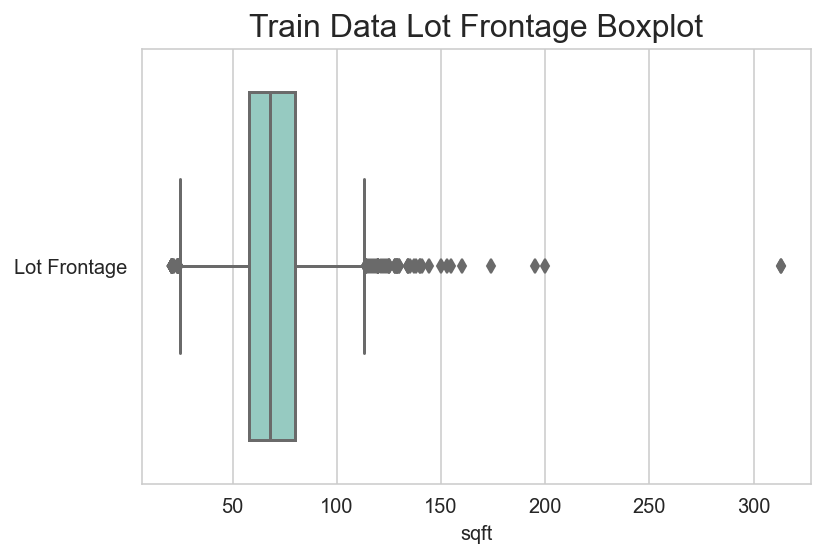

In [32]:
ax = plt.axes()#unpack this tuple into the variables
#plot the graphy
sns.boxplot(data=traindata[["Lot Frontage"]],orient="h",palette="Set3")
#set_title
ax.set_title("Train Data Lot Frontage Boxplot",fontsize=16)
#set xlabel
ax.set_xlabel('sqft')

Text(0.5, 0, 'sqft')

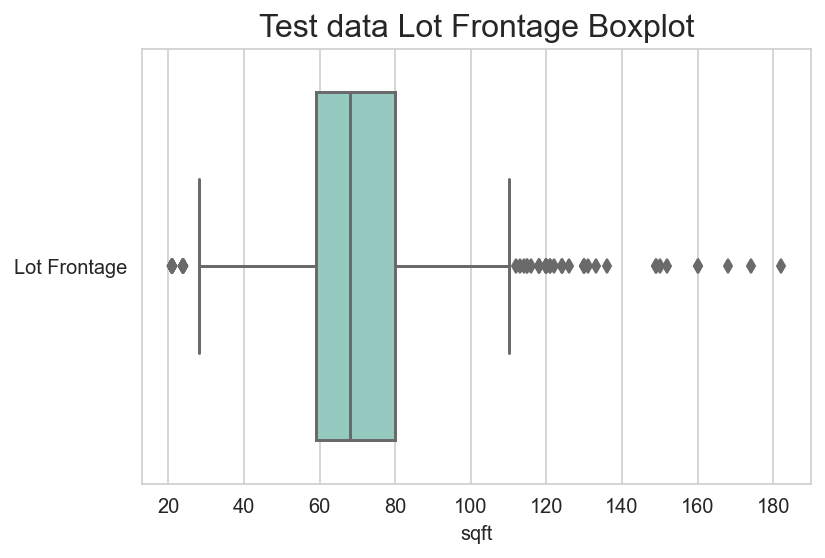

In [33]:
ax = plt.axes()#unpack this tuple into the variables
#plot the graphy
sns.boxplot(data=testdata[["Lot Frontage"]],orient="h",palette="Set3")
#set_title
ax.set_title("Test data Lot Frontage Boxplot",fontsize=16)
#set xlabel
ax.set_xlabel('sqft')

In [34]:
#replace the Nan value with mean for train data
traindata["Lot Frontage"]=traindata["Lot Frontage"].fillna(value=traindata["Lot Frontage"].mean())

In [35]:
#replace the nan value with mean for test data
testdata["Lot Frontage"]=testdata["Lot Frontage"].fillna(value=testdata["Lot Frontage"].mean())

#### There is an outliers which is more than 300sqft in traindata, we need to exam it whether it is a reasonable value.
#####  It seems to be a reasonable value

In [36]:
traindata[traindata["Lot Frontage"]>300]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
960            60        RL         313.0     63887   Pave    NA       IR3   
1335           20        RL         313.0     27650   Pave    NA       IR2   

     Land Contour Utilities Lot Config  ... Screen Porch Pool Area Pool QC  \
960           Bnk    AllPub     Corner  ...            0       480      Gd   
1335          HLS    AllPub     Inside  ...            0         0      NA   

     Fence Misc Feature Misc Val  Mo Sold  Yr Sold  Sale Type  SalePrice  
960     NA           NA        0        1     2008        New     160000  
1335    NA           NA        0       11     2008        WD      242000  

[2 rows x 78 columns]

#### 11. Feature engineering: 

##### Binarize `'Central Air'` column

In [37]:
#convert the "Central Air" column into numerical values
traindata['Central Air'] = traindata['Central Air'].map({'Y': 1, 'N': 0})

In [38]:
#convert the "Central Air" column into numerical values
testdata['Central Air'] = traindata['Central Air'].map({'Y': 1, 'N': 0})

##### Convert the numberic columns which is better to represent as categorical

In [39]:
#convert the numberic columns to str
traindata['MS SubClass'] = traindata['MS SubClass'].astype(str)

In [40]:
#convert the numberic columns to str
testdata['MS SubClass'] = traindata['MS SubClass'].astype(str)

In [41]:
#convert the numberic columns to str
traindata['Mo Sold'] = traindata['Mo Sold'].astype(str)

In [42]:
#convert the numberic columns to str
testdata['Mo Sold'] = testdata['Mo Sold'].astype(str)

In [43]:
#convert the numberic columns to str
traindata['Yr Sold'] = traindata['Yr Sold'].astype(str)

In [44]:
#convert the numberic columns to str
testdata['Yr Sold'] = testdata['Yr Sold'].astype(str)

#### Combine the features to creat interaction terms

In [45]:
#creat interaction terms
traindata['Lot Area * Frontage'] = traindata['Lot Area'] * traindata['Lot Frontage']

In [46]:
#creat interaction termsQ
testdata['Lot Area * Frontage'] = testdata['Lot Area'] * testdata['Lot Frontage']

In [47]:
#creat interaction terms
traindata['Year Built* Year Remod/Add'] = traindata['Year Built'] * traindata['Year Remod/Add']

In [48]:
#creat interaction terms
testdata['Year Built* Year Remod/Add'] = testdata['Year Built'] * traindata['Year Remod/Add']

#### 12.  Exam the distribution of Target and indentify/address the outliers

##### In this section, we will see the distrubution of the most important variable which is our sales price, and find any unreasonable outliers in the features
#####  From the boxplot and statistic summary we can see that, A mean and median sale price of 181469 and 162500 USD respectively, 50% house in AMES with the Sales price between 130000 to 214000 USD, the distribution of Sale price is positive skewed. They are some outliers for the price more than 350000USD. 
##### All the outliers in the data fell in the reasonable range of the data, there is no outlier identified due to data entry /measuring errors.  All the outliers in the data sets should be caused by natural variation. And since the number of datas are not very large <2500, the removal of outlier affects the model greatly. In order to keep the data complete for modeling, I decide not to remove/modify them.

In [49]:
#get an list contain all numberic columns
train_numberic_column=traindata._get_numeric_data().columns

In [50]:
#get an list contain all numberic columns
test_numberic_column=testdata._get_numeric_data().columns

In [51]:
#display the numberic columns
train_numberic_column

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'SalePrice', 'Lot Area * Frontage', 'Year Built* Year Remod/Add'],
      dtype='object')

Text(0, 0.5, 'Lot Area')

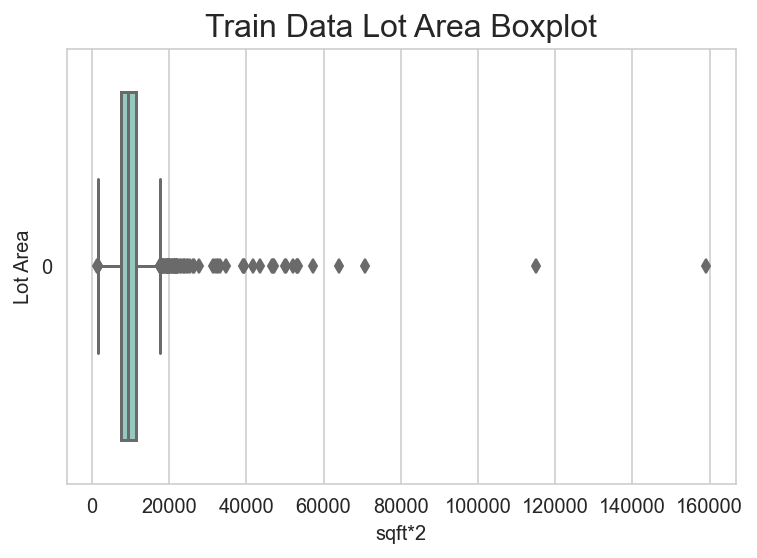

In [52]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=traindata["Lot Area"],orient="h",palette="Set3")
#set_title
ax.set_title("Train Data Lot Area Boxplot",fontsize=16)
#set xlabel
ax.set_xlabel('sqft*2')
#set ylabel
ax.set_ylabel('Lot Area')

Text(0, 0.5, 'Lot Area')

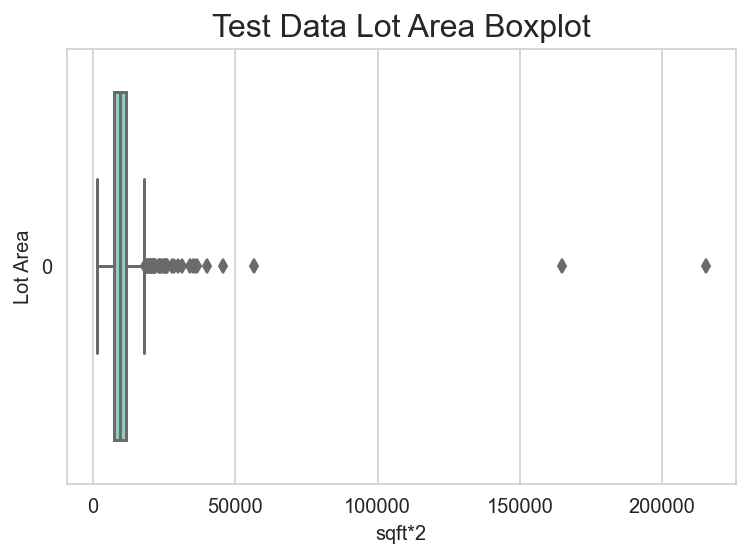

In [53]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=testdata["Lot Area"],orient="h",palette="Set3")
#set_title
ax.set_title("Test Data Lot Area Boxplot",fontsize=16)
#set xlabel
ax.set_xlabel('sqft*2')
#set ylabel
ax.set_ylabel('Lot Area')

Text(0.5, 1.0, 'Overall Qual/Cond Boxplot')

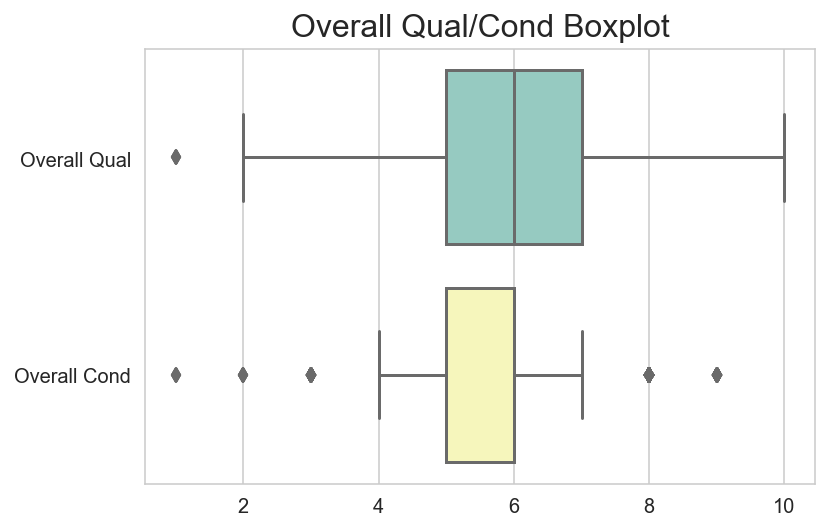

In [54]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=traindata[["Overall Qual","Overall Cond"]],orient="h",palette="Set3")
#set_title
ax.set_title("Overall Qual/Cond Boxplot",fontsize=16)

Text(0.5, 1.0, 'Overall Qual/Cond Boxplot')

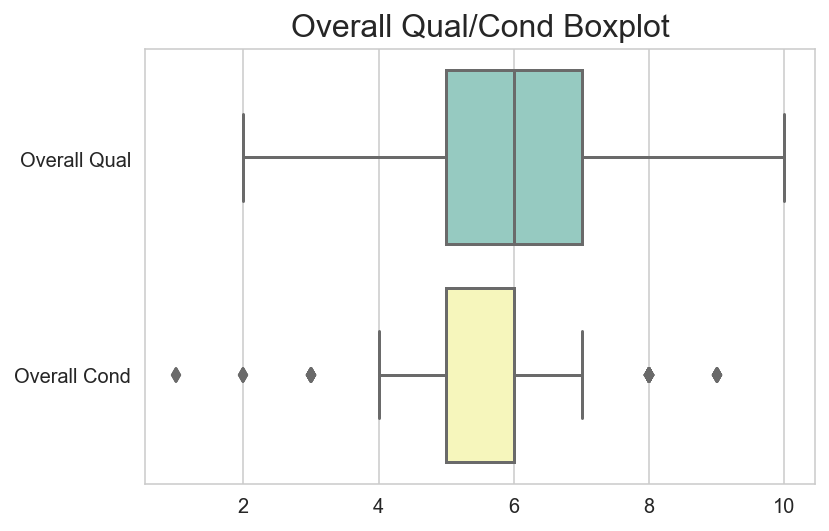

In [55]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=testdata[["Overall Qual","Overall Cond"]],orient="h",palette="Set3")
#set_title
ax.set_title("Overall Qual/Cond Boxplot",fontsize=16)

Text(0.5, 0, 'year')

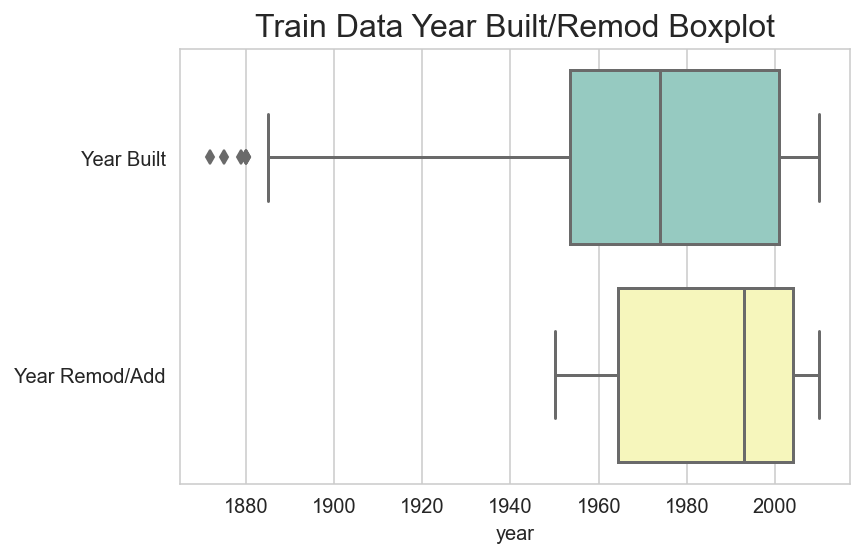

In [56]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=traindata[['Year Built', 'Year Remod/Add']],orient="h",palette="Set3")
#set_title
ax.set_title("Train Data Year Built/Remod Boxplot",fontsize=16)
#set xlabel
ax.set_xlabel('year')

Text(0.5, 0, 'year')

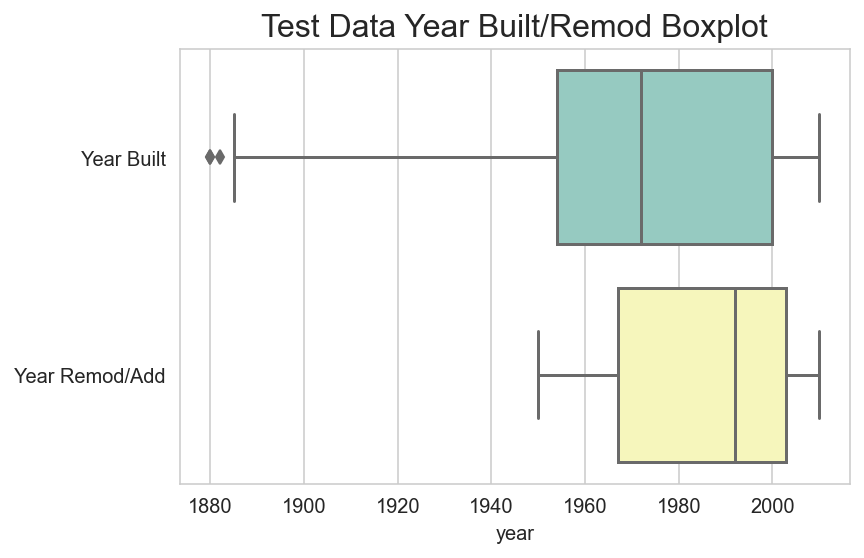

In [57]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=testdata[['Year Built', 'Year Remod/Add']],orient="h",palette="Set3")
#set_title
ax.set_title("Test Data Year Built/Remod Boxplot",fontsize=16)
#set xlabel
ax.set_xlabel('year')

Text(0.5, 1.0, 'Train Data Boxplot')

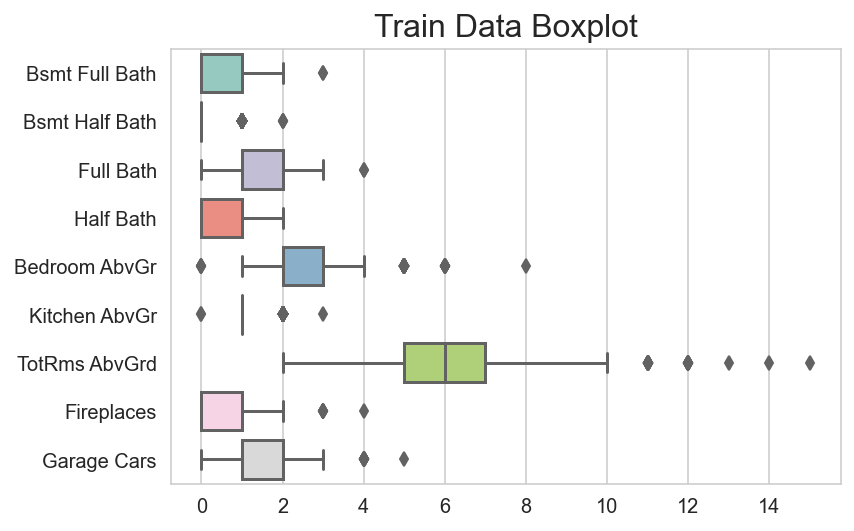

In [58]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=traindata[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces','Garage Cars']],orient="h",palette="Set3")
#set_title
ax.set_title("Train Data Boxplot",fontsize=16)

Text(0.5, 1.0, 'Test Data Boxplot')

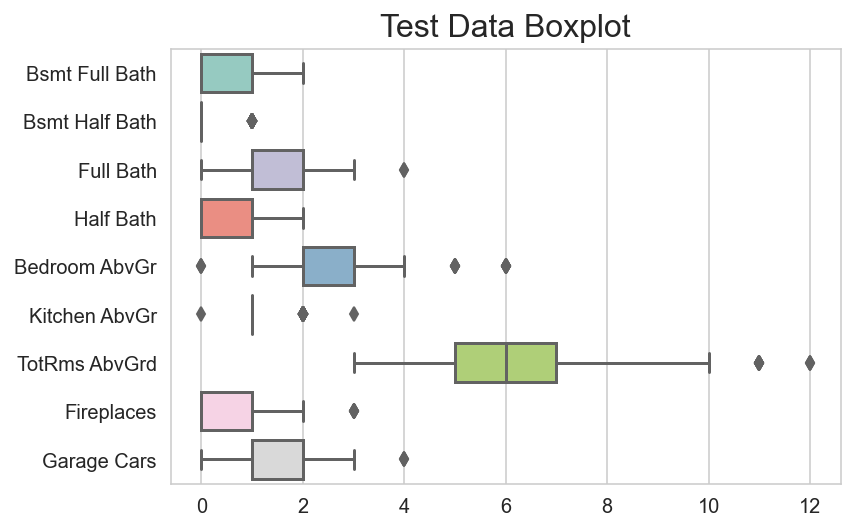

In [59]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=testdata[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces','Garage Cars']],orient="h",palette="Set3")
#set_title
ax.set_title("Test Data Boxplot",fontsize=16)

Text(0.5, 1.0, 'Train Data Boxplot')

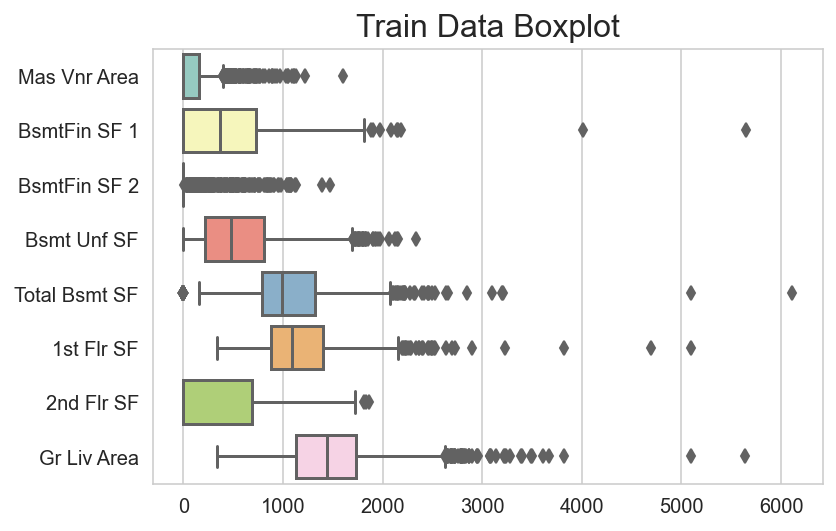

In [60]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=traindata[['Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF','1st Flr SF', '2nd Flr SF','Gr Liv Area']],orient="h",palette="Set3")
#set_title
ax.set_title("Train Data Boxplot",fontsize=16)

Text(0.5, 1.0, 'Test Data Boxplot')

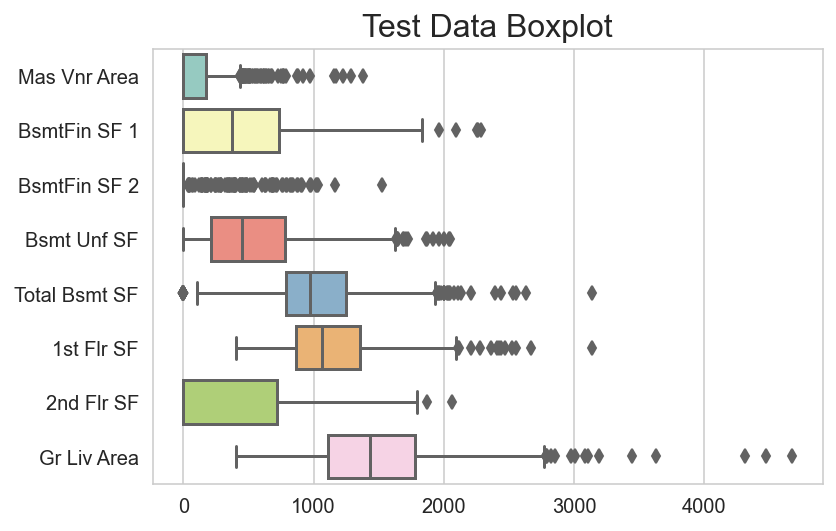

In [61]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=testdata[['Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF','1st Flr SF', '2nd Flr SF','Gr Liv Area']],orient="h",palette="Set3")
#set_title
ax.set_title("Test Data Boxplot",fontsize=16)

Text(0.5, 1.0, 'Train Data Boxplot')

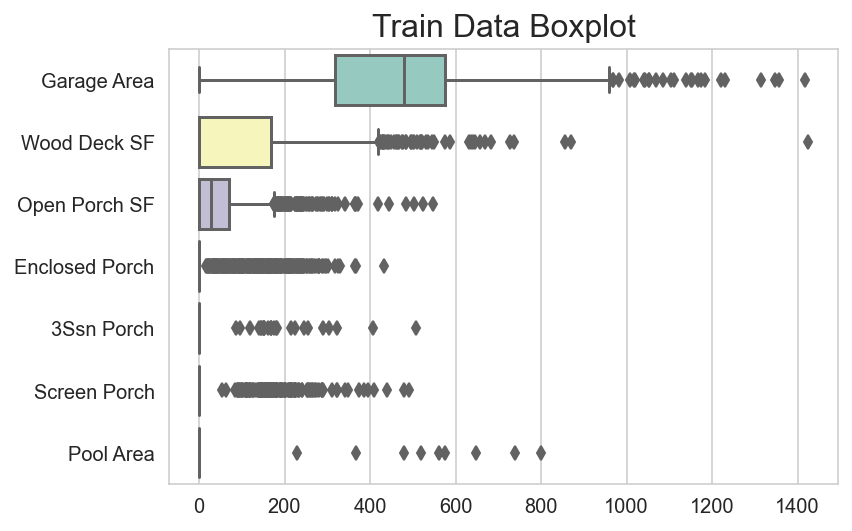

In [62]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=traindata[['Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',]],orient="h",palette="Set3")
#set_title
ax.set_title("Train Data Boxplot",fontsize=16)

Text(0.5, 1.0, 'Test Data Boxplot')

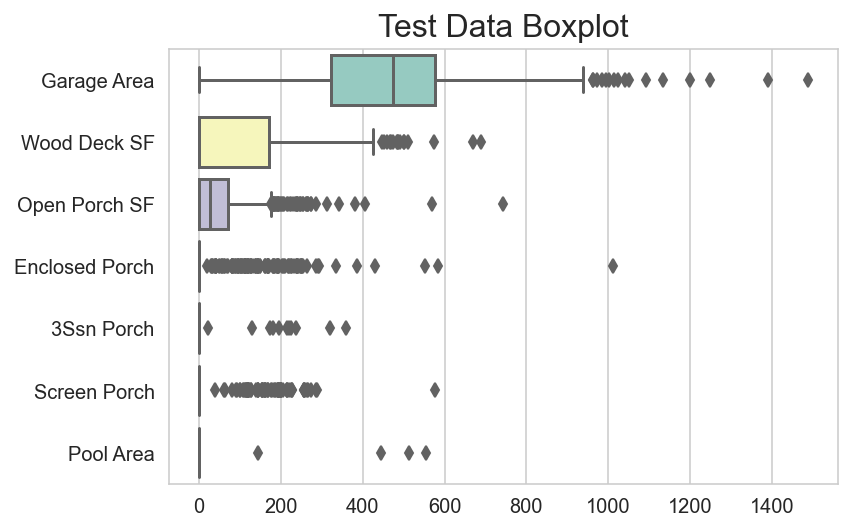

In [63]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=testdata[['Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',]],orient="h",palette="Set3")
#set_title
ax.set_title("Test Data Boxplot",fontsize=16)

Text(0.5, 1.0, 'Train Data SalePrice Boxplot')

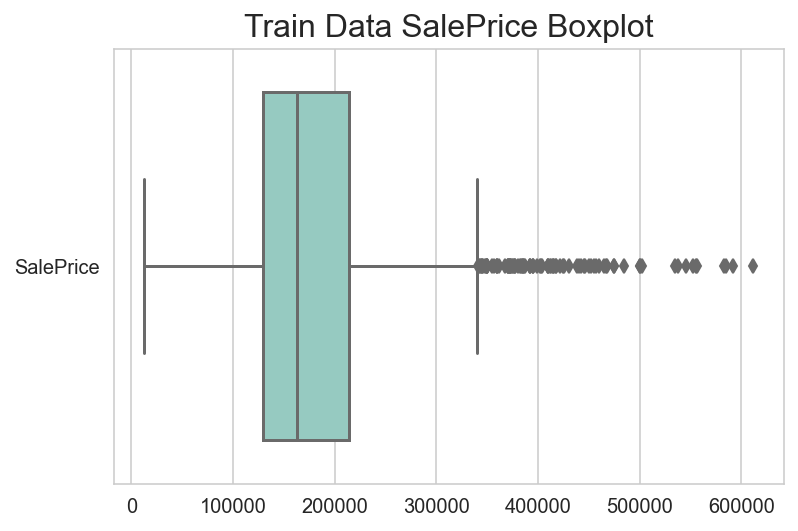

In [64]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(data=traindata[['SalePrice']],orient="h",palette="Set3")
#set_title
ax.set_title("Train Data SalePrice Boxplot",fontsize=16)

#### 13. Exploratory Relationships to Target

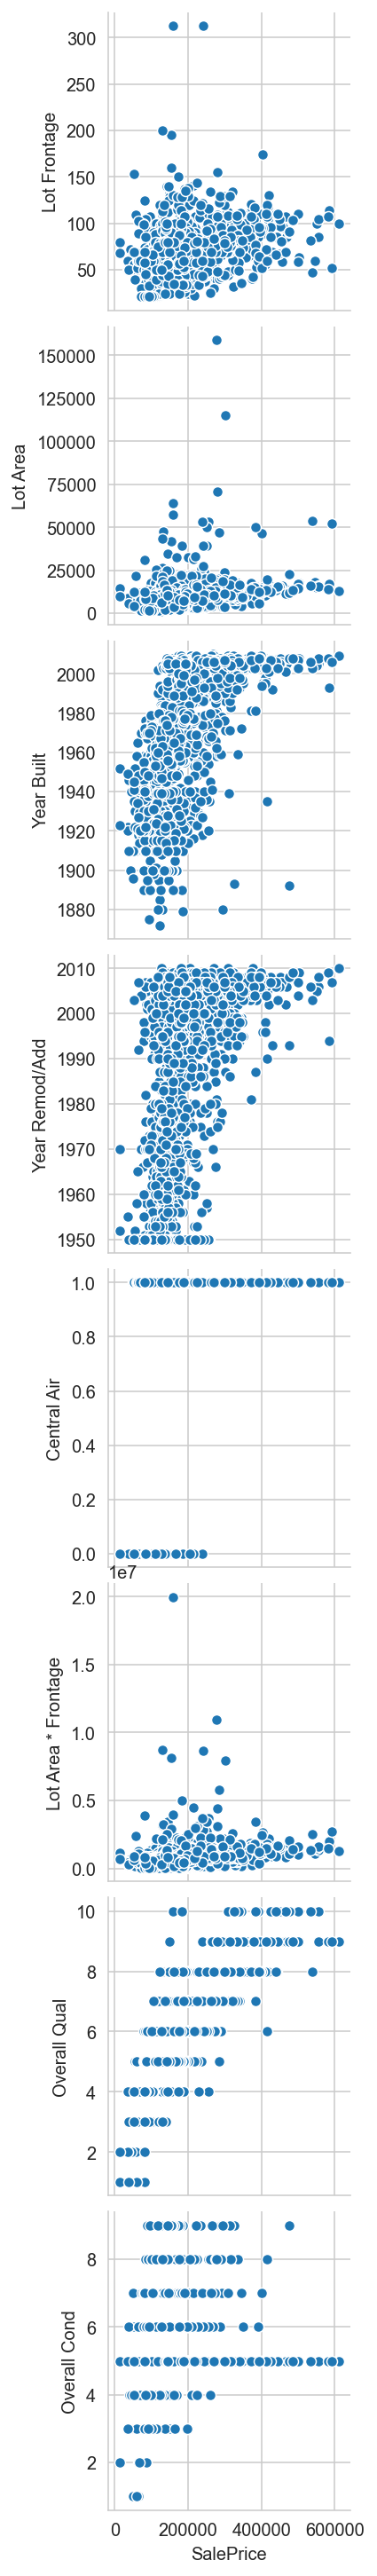

In [112]:
#plot the graphy

sns.pairplot(traindata, y_vars=['Lot Frontage', 'Lot Area',
       'Year Built', 'Year Remod/Add',"Central Air",'Lot Area * Frontage',"Overall Qual","Overall Cond"], x_vars=['SalePrice'])

##### Overal Qual, Year Built and Year Remod shows strong linear relationship with sale price.

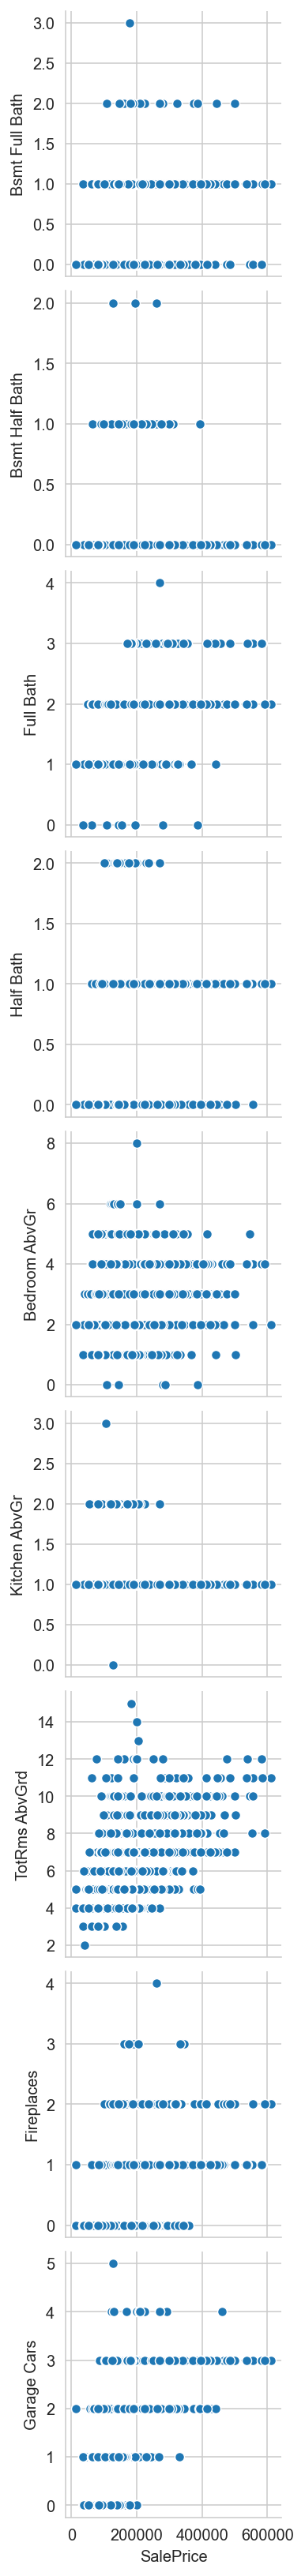

In [66]:
#plot the graphy
sns.pairplot(traindata, y_vars=['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces','Garage Cars'], x_vars=['SalePrice'])

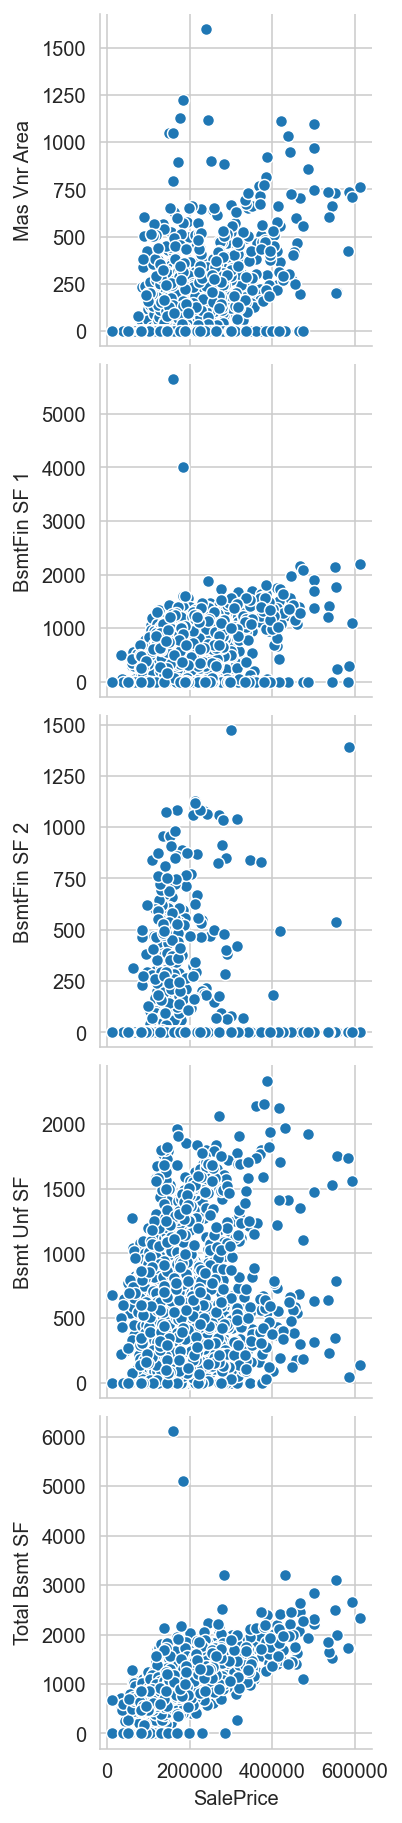

In [67]:
#plot the graphy
sns.pairplot(traindata, y_vars=['Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF'], x_vars=['SalePrice'])

##### Total Bsmt Area shows Strong linear relationship with sale price

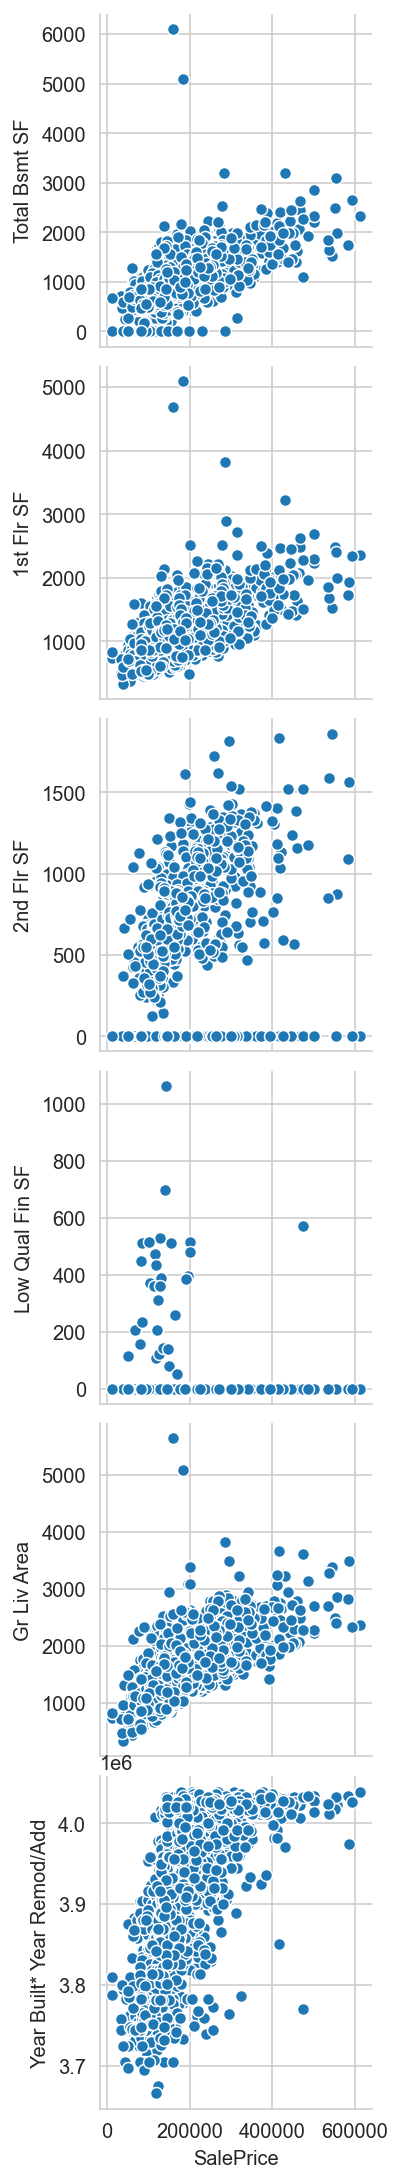

In [68]:
#plot the graphy
sns.pairplot(traindata, y_vars=['Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area','Year Built* Year Remod/Add'], x_vars=['SalePrice'])

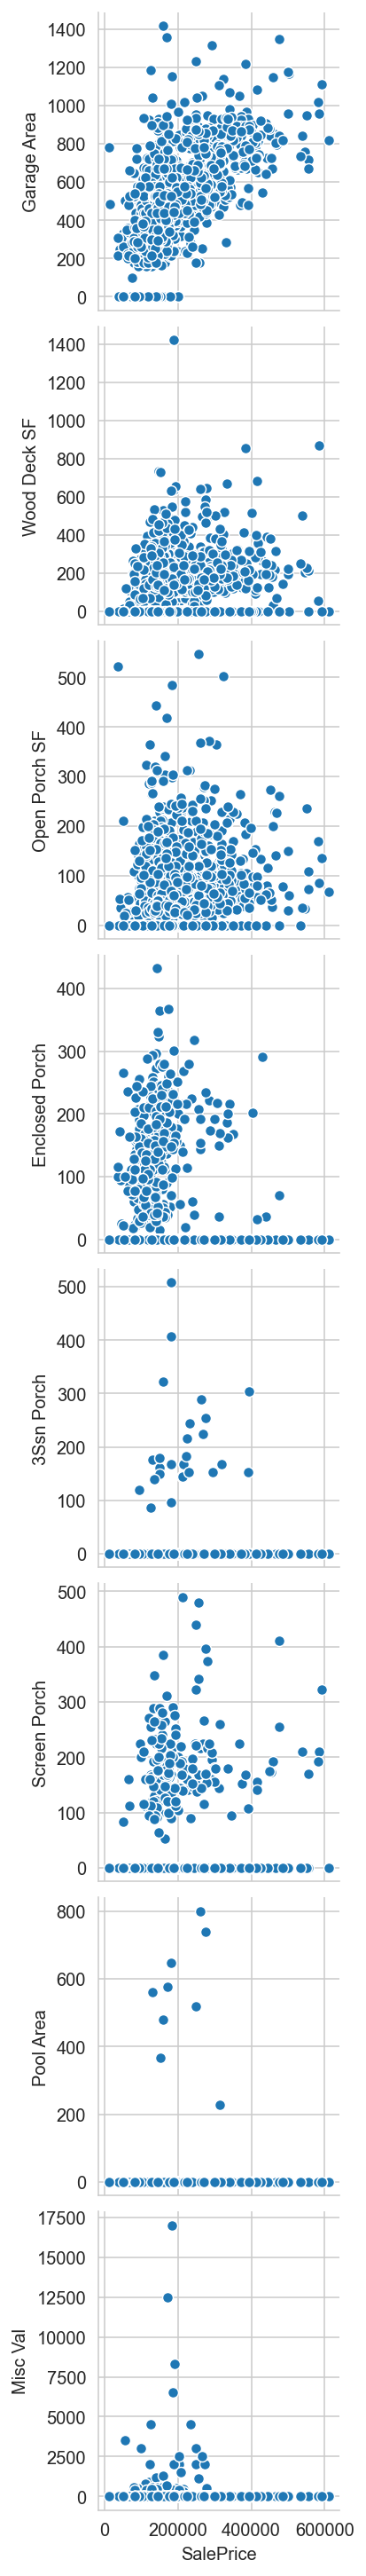

In [69]:
#plot the graphy
sns.pairplot(traindata, y_vars=['Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val'], x_vars=['SalePrice'])

##### Garage Area show better linear relationship with sales price

Text(0.5, 1.0, 'MS SubClass VS SalesPrice Boxplot')

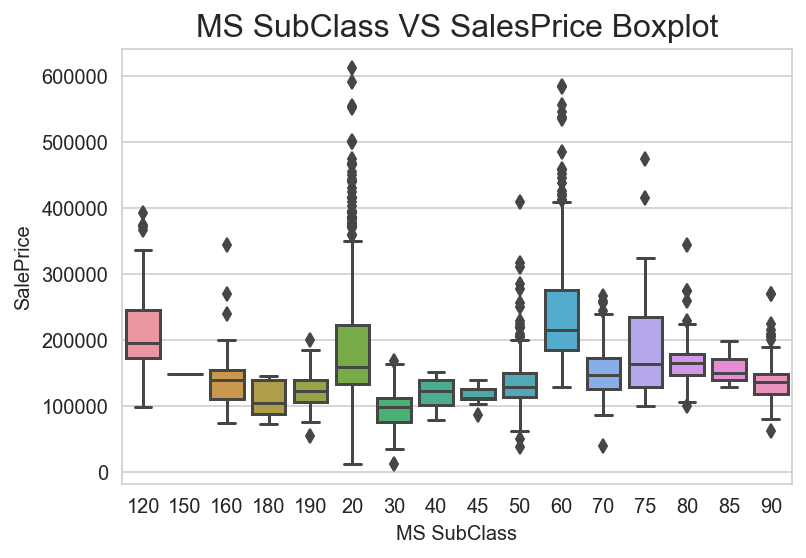

In [70]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='MS SubClass', y='SalePrice',data=traindata)
#set_title
ax.set_title("MS SubClass VS SalesPrice Boxplot",fontsize=16)

#### House with 2-STORY 1946 & NEWER shows higher sale price than others

Text(0.5, 1.0, 'MS Zoning VS SalesPrice Boxplot')

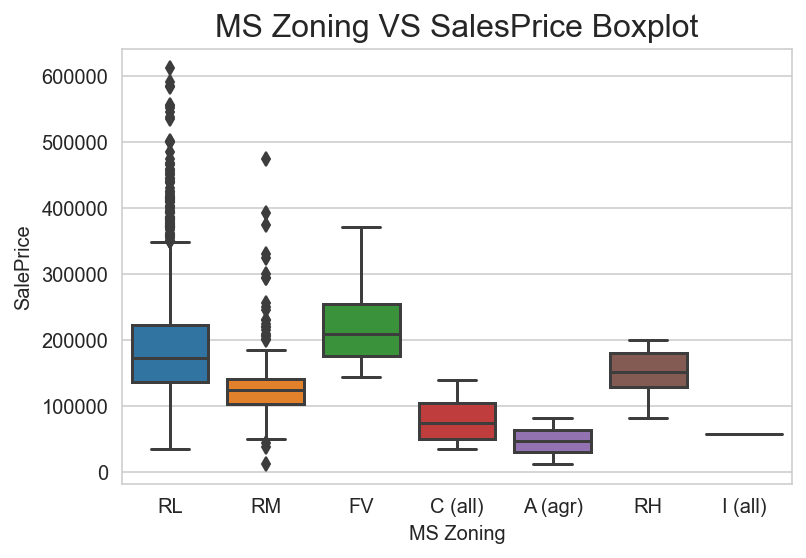

In [71]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='MS Zoning', y='SalePrice',data=traindata)
#set_title
ax.set_title("MS Zoning VS SalesPrice Boxplot",fontsize=16)

##### House located in Floating Village Residential zone shows to higher sale price in average than others

Text(0.5, 1.0, 'Street VS SalesPrice Boxplot')

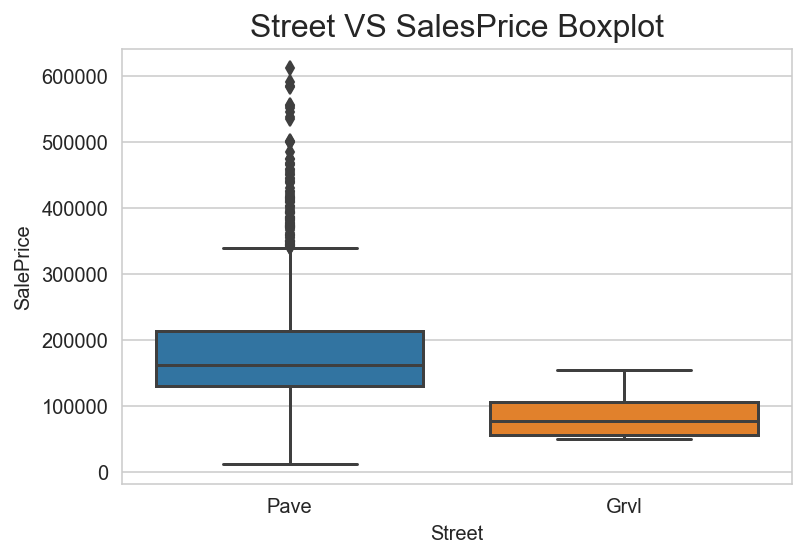

In [72]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Street', y='SalePrice',data=traindata)
#set_title
ax.set_title("Street VS SalesPrice Boxplot",fontsize=16)

##### House located in Pave street will have the price advantage than Grvl

Text(0.5, 1.0, 'Alley VS SalesPrice Boxplot')

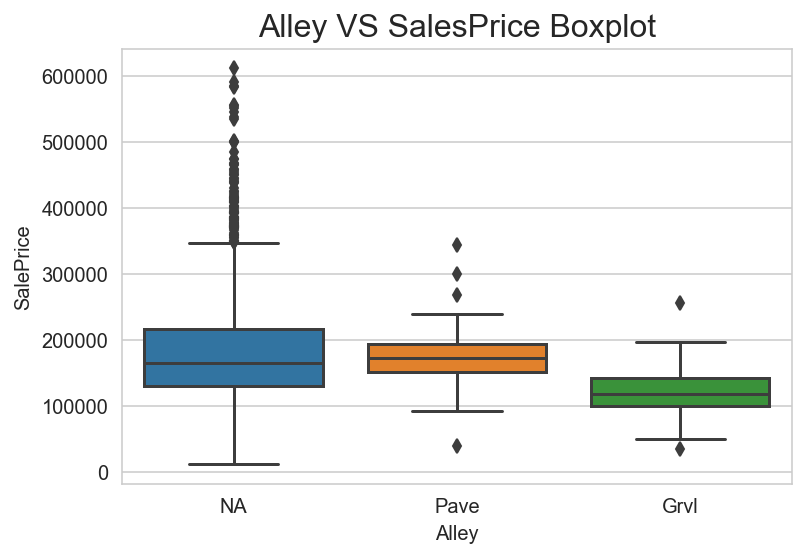

In [73]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Alley', y='SalePrice',data=traindata)
#set_title
ax.set_title("Alley VS SalesPrice Boxplot",fontsize=16)

Text(0.5, 1.0, 'Lot Shape VS SalesPrice Boxplot')

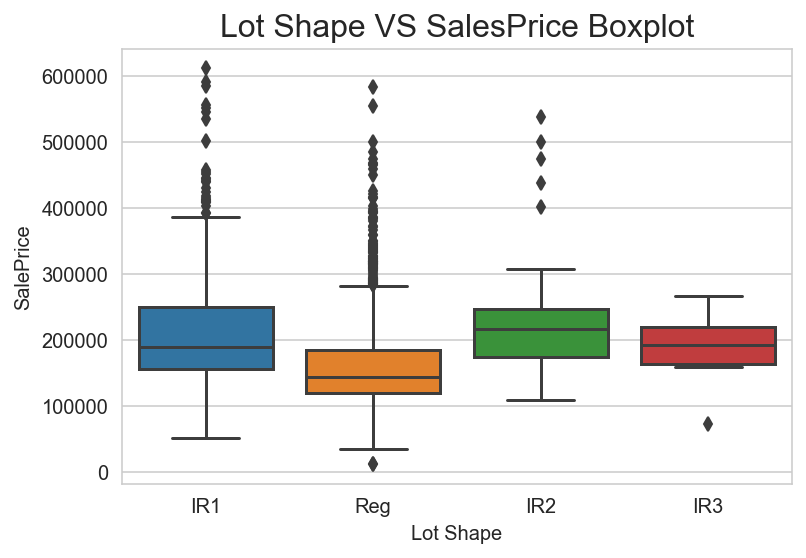

In [74]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Lot Shape', y='SalePrice',data=traindata)
#set_title
ax.set_title("Lot Shape VS SalesPrice Boxplot",fontsize=16)

##### Regular Lot shape tend to have low sales price

Text(0.5, 1.0, 'Land Contour VS SalesPrice Boxplot')

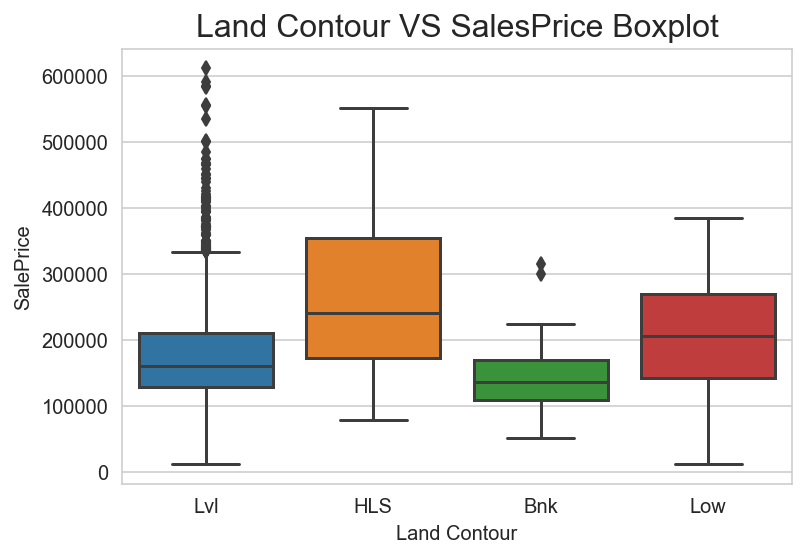

In [75]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Land Contour', y='SalePrice',data=traindata)
#set_title
ax.set_title("Land Contour VS SalesPrice Boxplot",fontsize=16)

#### Hillside house tend to have high sales price

Text(0.5, 1.0, 'Utilities VS SalesPrice Boxplot')

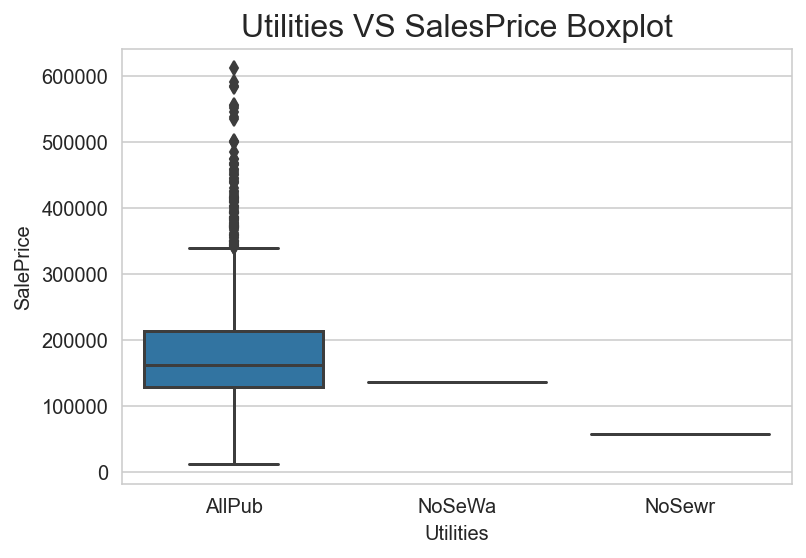

In [76]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Utilities', y='SalePrice',data=traindata)
#set_title
ax.set_title("Utilities VS SalesPrice Boxplot",fontsize=16)

##### House with all public Utilities tend to have better sales price

Text(0.5, 1.0, 'Lot Config VS SalesPrice Boxplot')

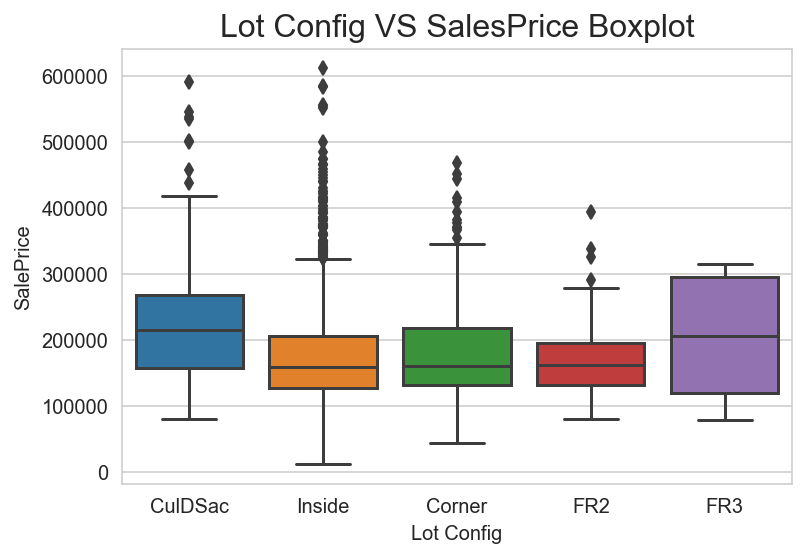

In [77]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Lot Config', y='SalePrice',data=traindata)
#set_title
ax.set_title("Lot Config VS SalesPrice Boxplot",fontsize=16)

#### No strong relationship between lot config and salesprice

Text(0.5, 1.0, 'Land Slope VS SalesPrice Boxplot')

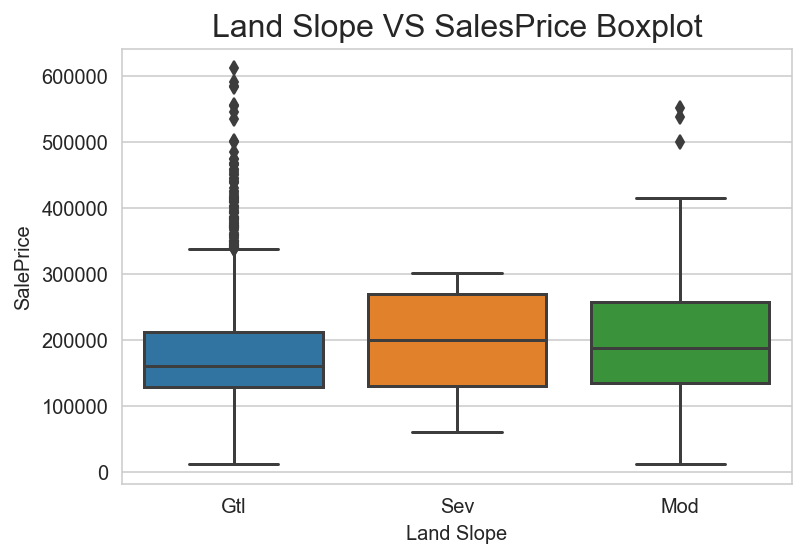

In [78]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Land Slope', y='SalePrice',data=traindata)
#set_title
ax.set_title("Land Slope VS SalesPrice Boxplot",fontsize=16)

#### No strong relationship between land slope and sales price

Text(0.5, 1.0, 'Neighborhood VS SalesPrice Boxplot')

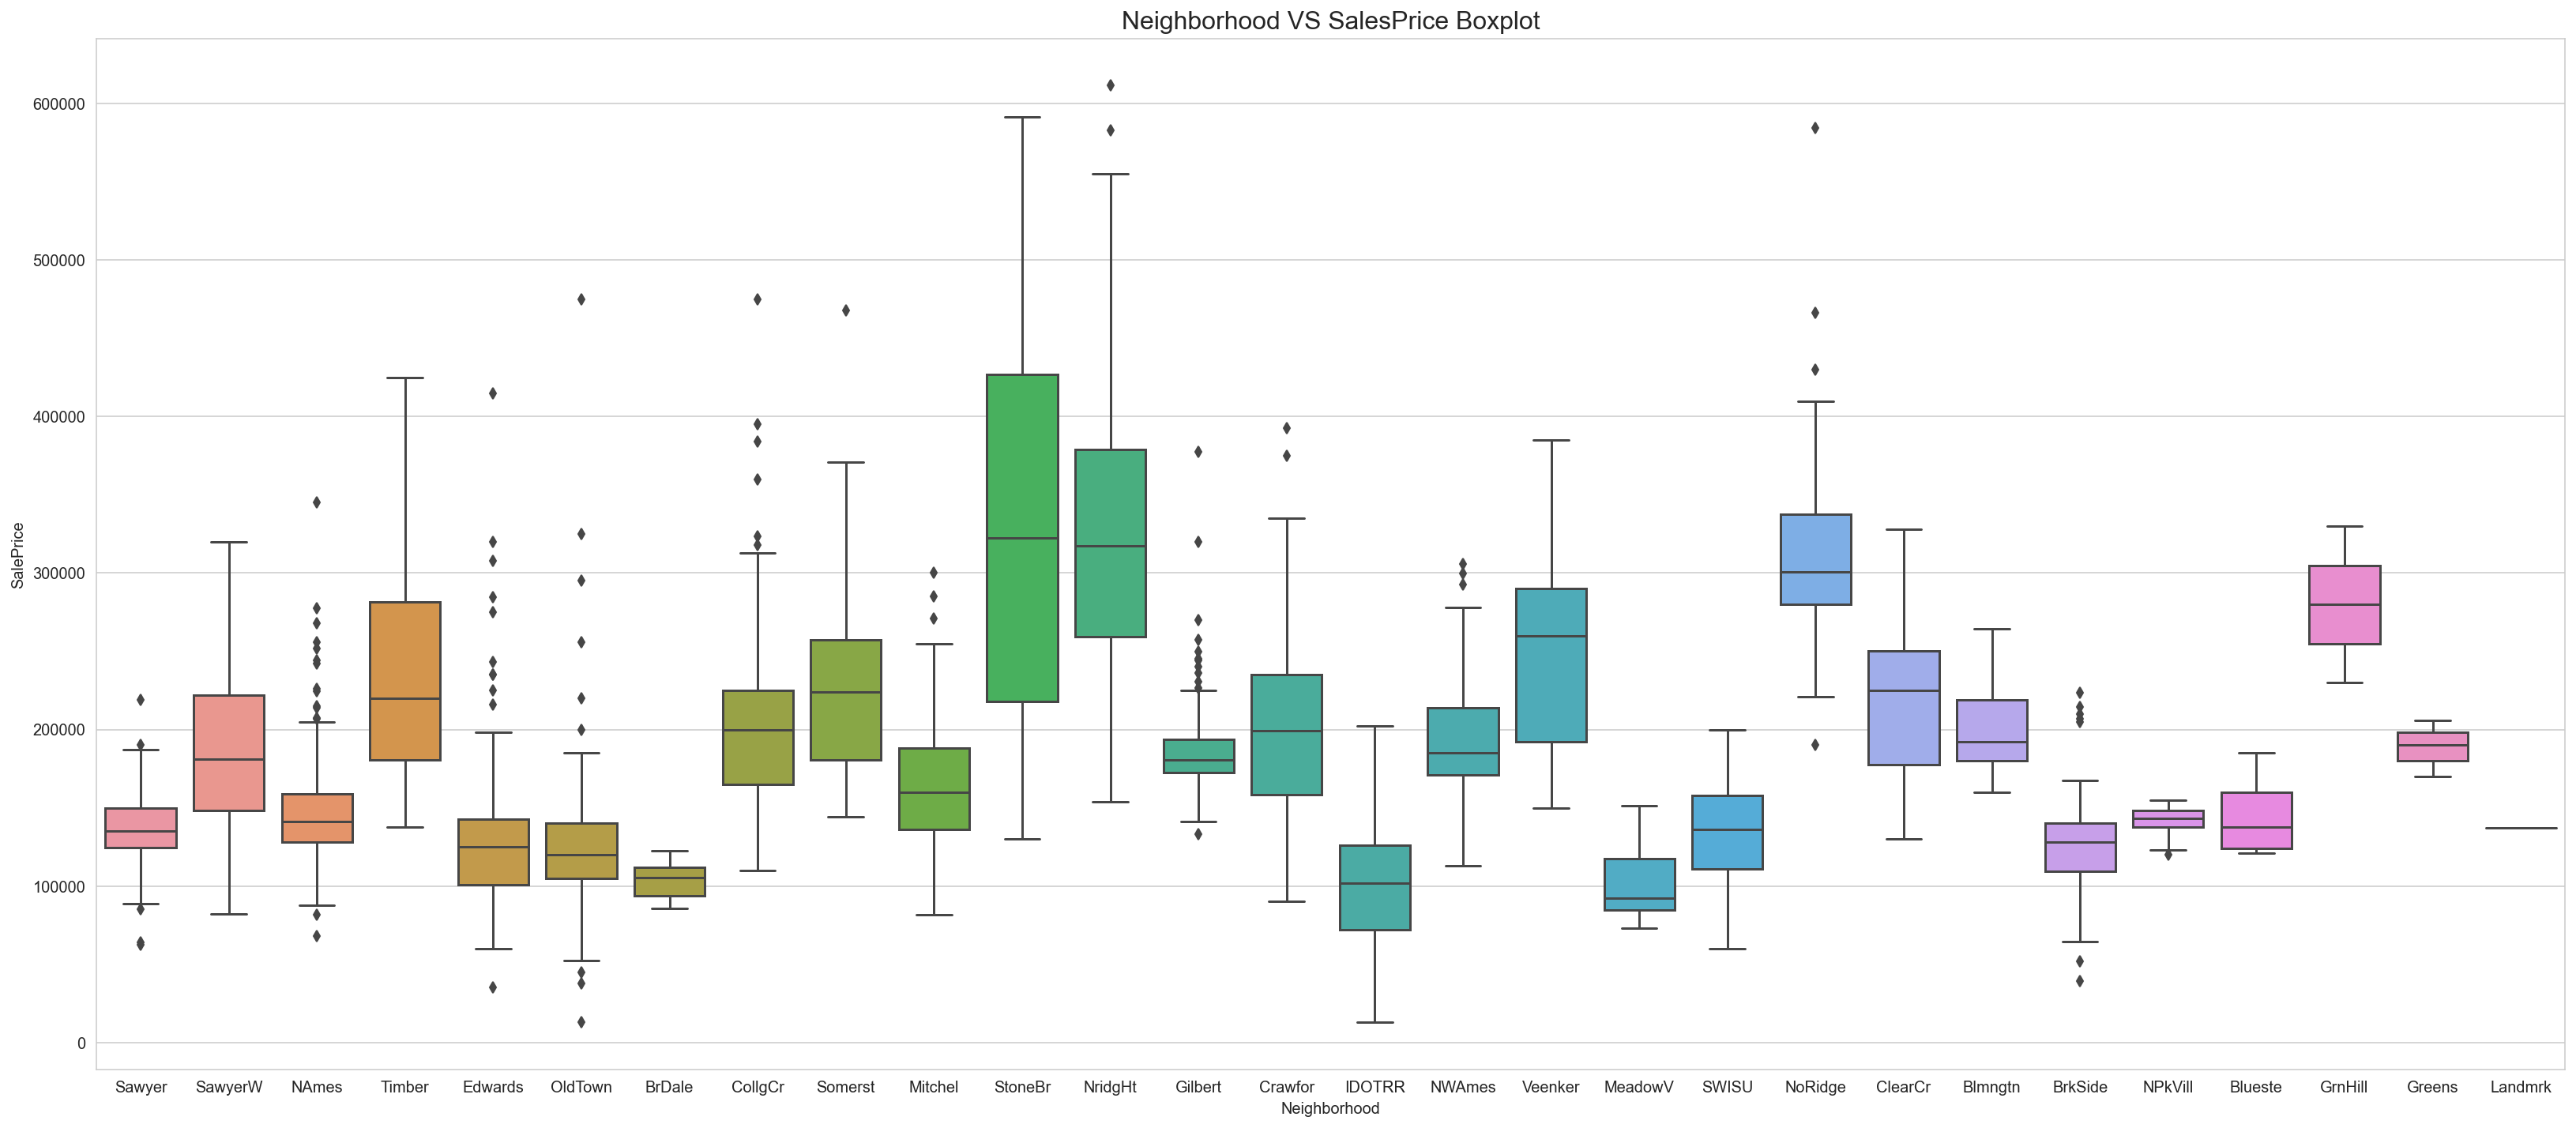

In [79]:
#set the figsize
plt.figure(figsize=(28, 12))
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Neighborhood', y='SalePrice',data=traindata)
#set_title
ax.set_title("Neighborhood VS SalesPrice Boxplot",fontsize=16)

##### House located in Northridge,Stone Brook and Northridge Heights tend to have high sales price

Text(0.5, 1.0, 'Condition 1 VS SalesPrice Boxplot')

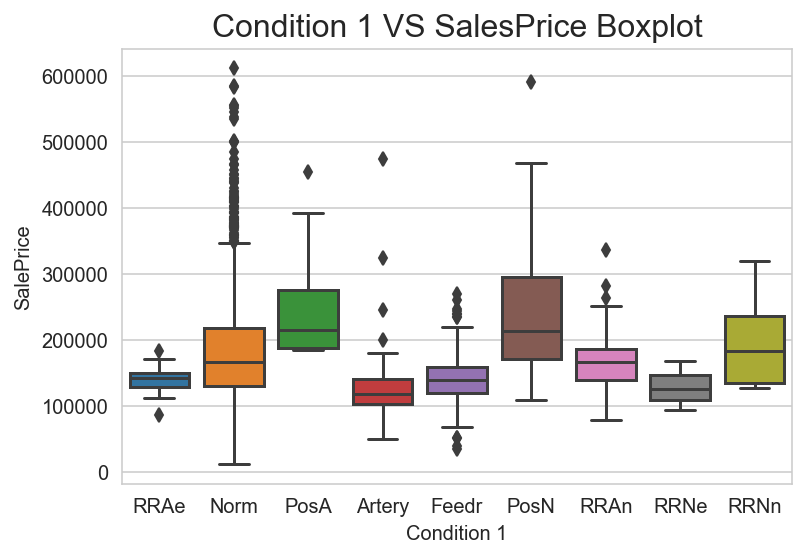

In [80]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Condition 1', y='SalePrice',data=traindata)
#set_title
ax.set_title("Condition 1 VS SalesPrice Boxplot",fontsize=16)

##### House Near positive off-site feature or Adjacent to postive off-site feature tend to have higher price

Text(0.5, 1.0, 'Condition 2 VS SalesPrice Boxplot')

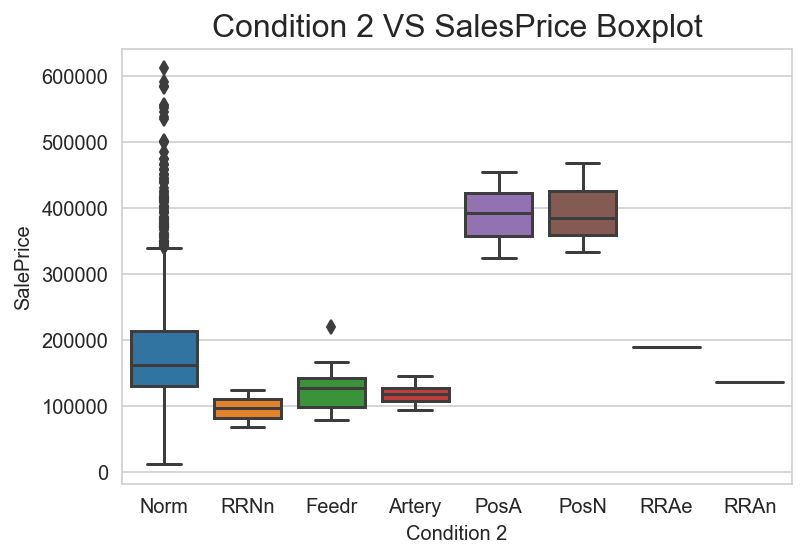

In [81]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Condition 2', y='SalePrice',data=traindata)
#set_title
ax.set_title("Condition 2 VS SalesPrice Boxplot",fontsize=16)

##### House Near positive off-site feature or Adjacent to postive off-site feature tend to have higher price

Text(0.5, 1.0, 'Bldg Type VS SalesPrice Boxplot')

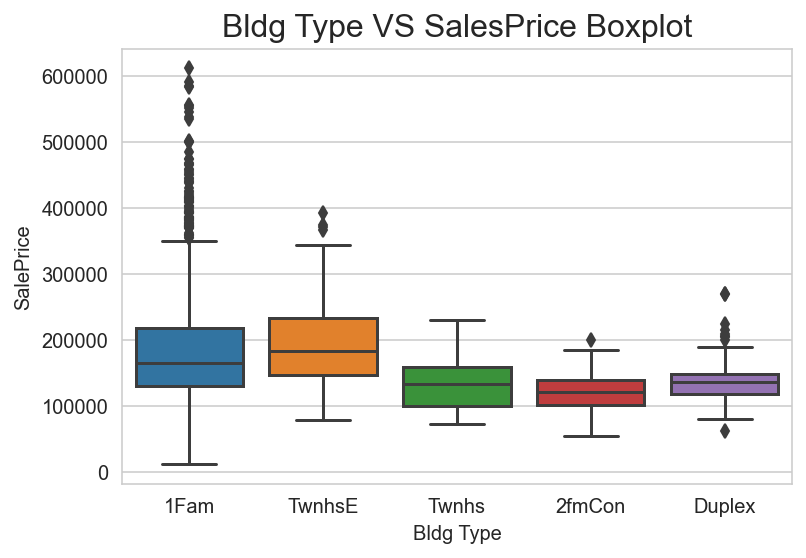

In [82]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Bldg Type', y='SalePrice',data=traindata)
#set_title
ax.set_title("Bldg Type VS SalesPrice Boxplot",fontsize=16)

#### Townhouse End Unit tend to have better sales price

Text(0.5, 1.0, 'House Style VS SalesPrice Boxplot')

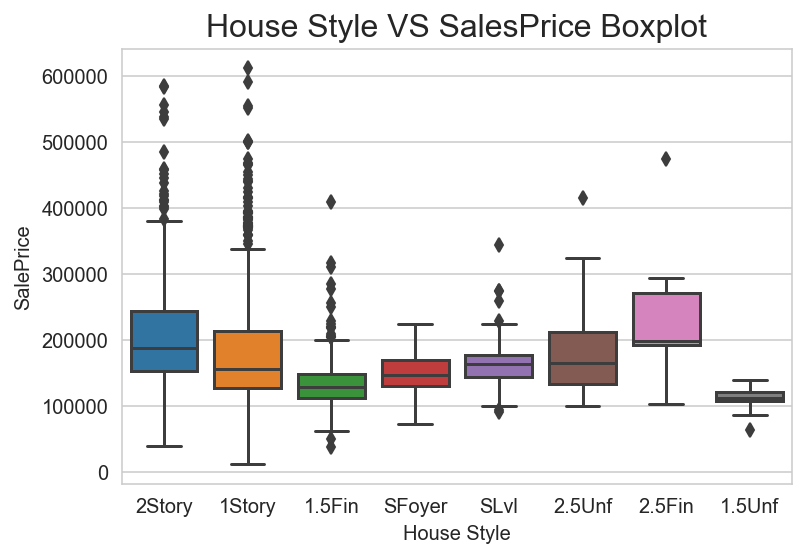

In [83]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='House Style', y='SalePrice',data=traindata)
#set_title
ax.set_title("House Style VS SalesPrice Boxplot",fontsize=16)

##### Housing stytle with Two and one-half story: 2nd level finished tend to have higher sales price

Text(0.5, 1.0, 'Roof Style VS SalesPrice Boxplot')

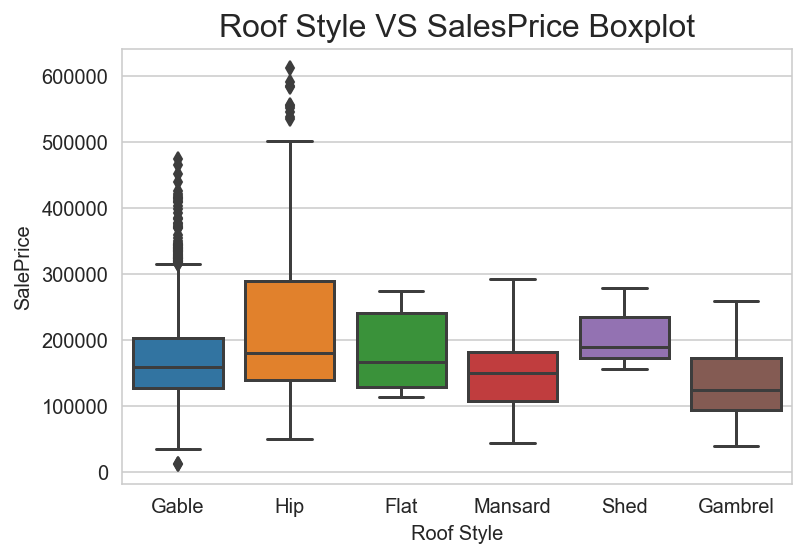

In [84]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Roof Style', y='SalePrice',data=traindata)
#set_title
ax.set_title("Roof Style VS SalesPrice Boxplot",fontsize=16)

##### House with shed roof style tend to have better price

Text(0.5, 1.0, 'Roof Matl VS SalesPrice Boxplot')

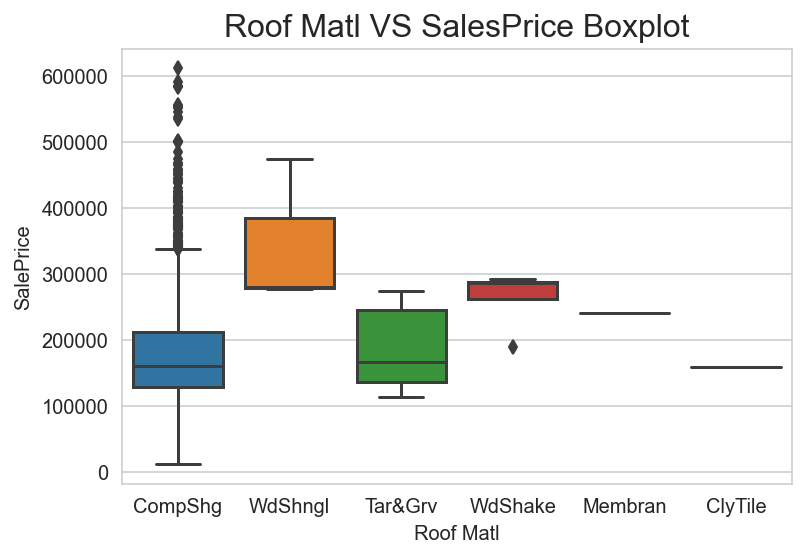

In [85]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Roof Matl', y='SalePrice',data=traindata)
#set_title
ax.set_title("Roof Matl VS SalesPrice Boxplot",fontsize=16)

##### roof material with Wood Shingles tend to have better sales price

Text(0.5, 1.0, 'Exterior 1st VS SalesPrice Boxplot')

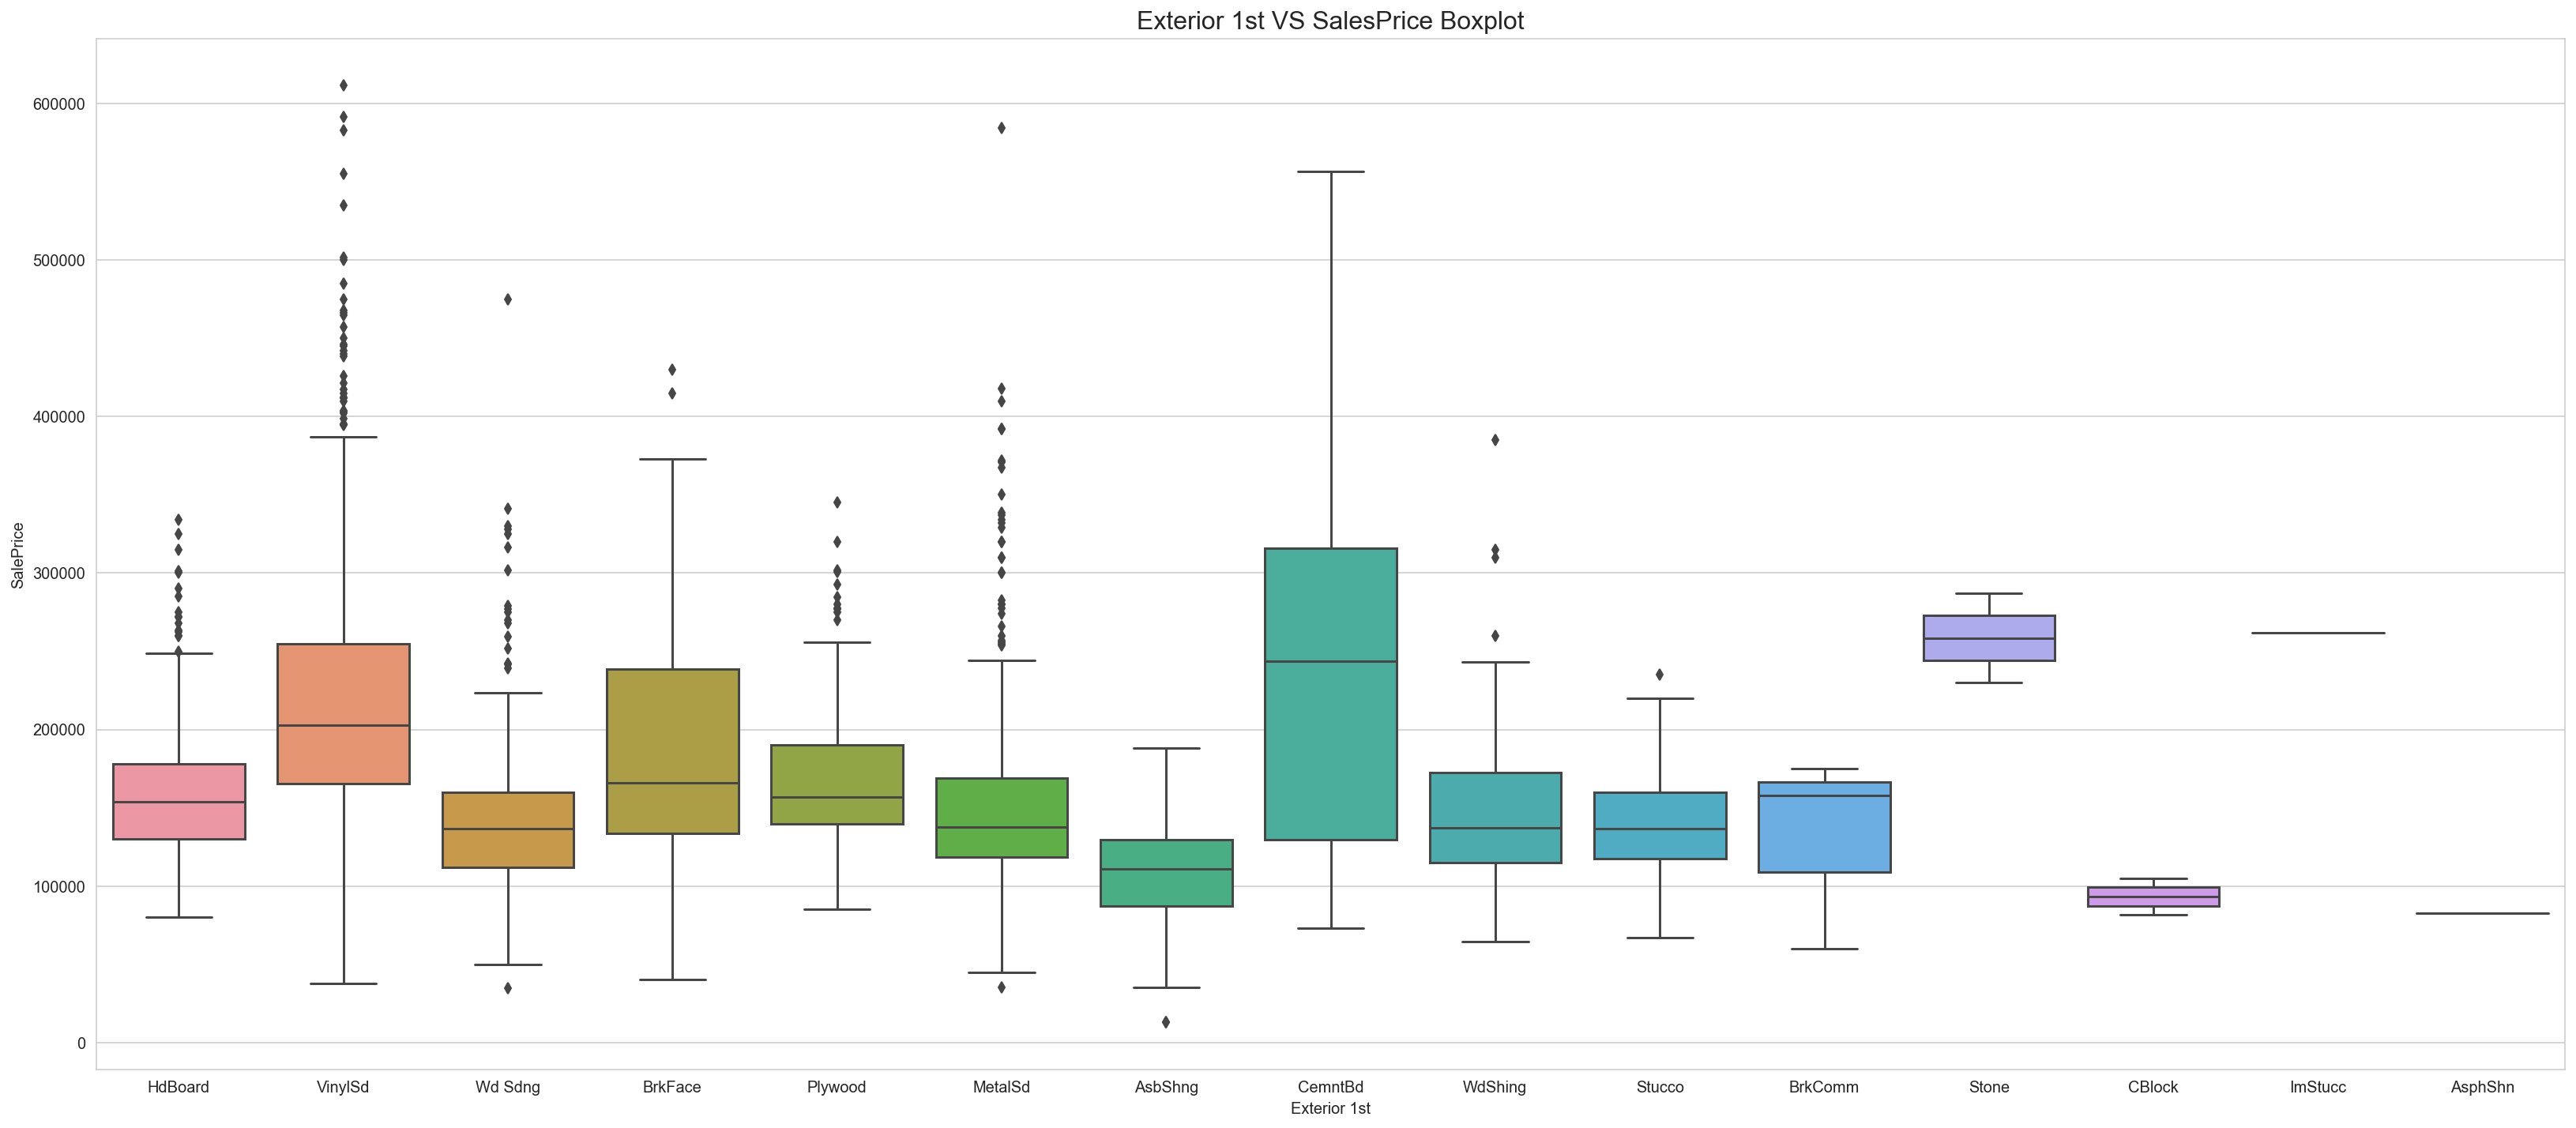

In [86]:
#set the figsize
plt.figure(figsize=(28, 12))
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Exterior 1st', y='SalePrice',data=traindata)
#set_title
ax.set_title("Exterior 1st VS SalesPrice Boxplot",fontsize=16)

##### Stone Exterior covering on house tend to have better sales price

Text(0.5, 1.0, 'Exterior 2nd VS SalesPrice Boxplot')

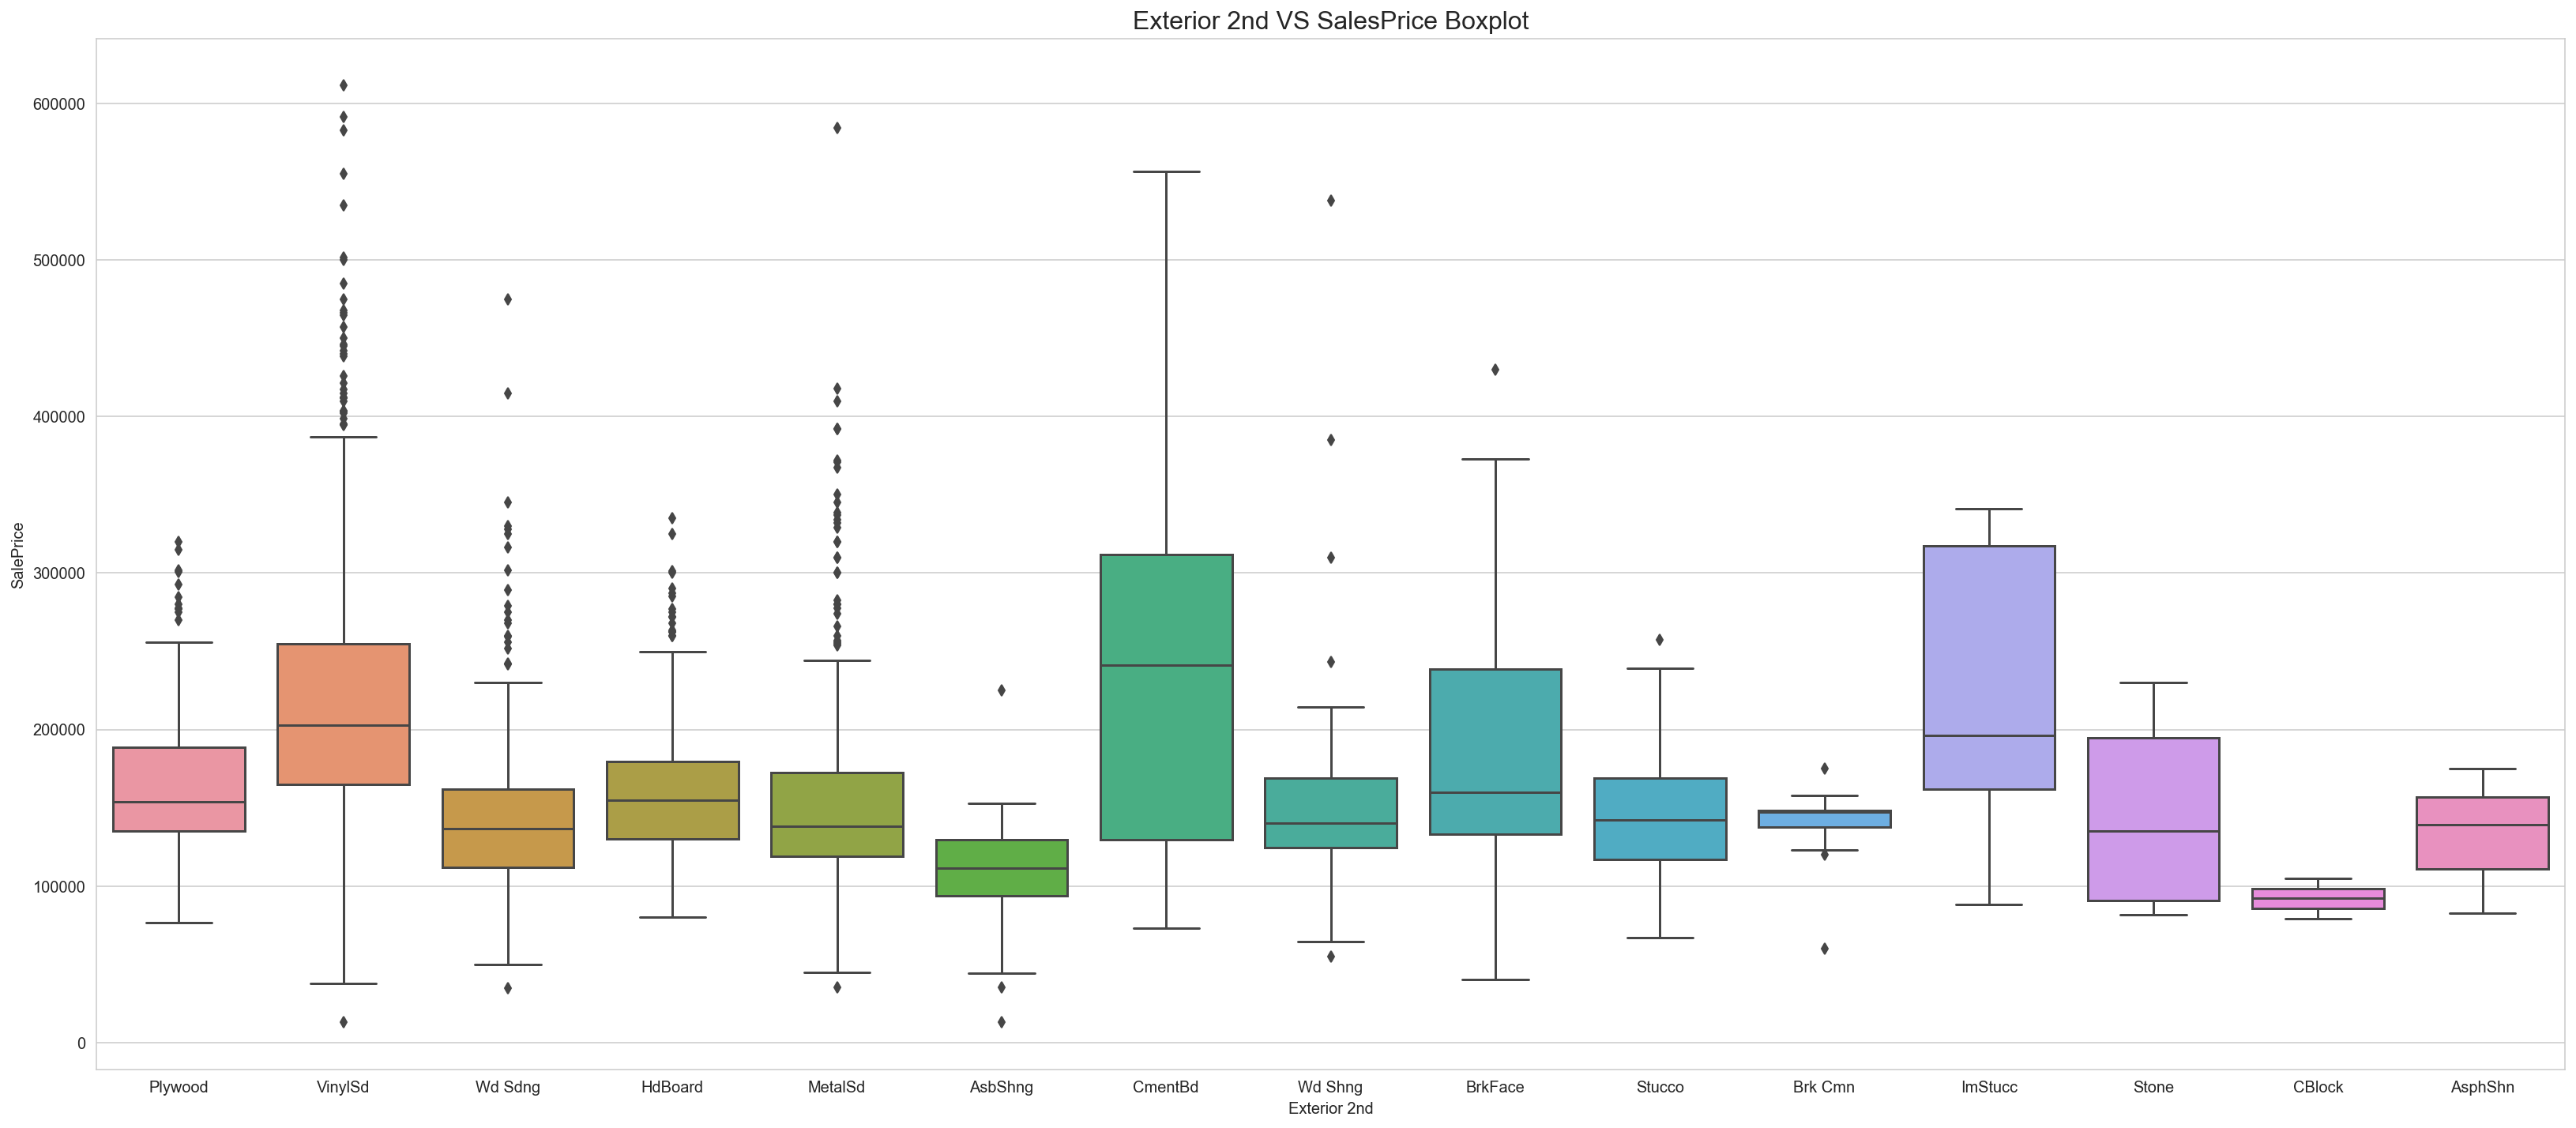

In [87]:
#set the figsize
plt.figure(figsize=(28, 12))
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Exterior 2nd', y='SalePrice',data=traindata)
#set_title
ax.set_title("Exterior 2nd VS SalesPrice Boxplot",fontsize=16)

##### Cement Board Exterior covering on house tend to have better sales price

Text(0.5, 1.0, 'Mas Vnr Type VS SalesPrice Boxplot')

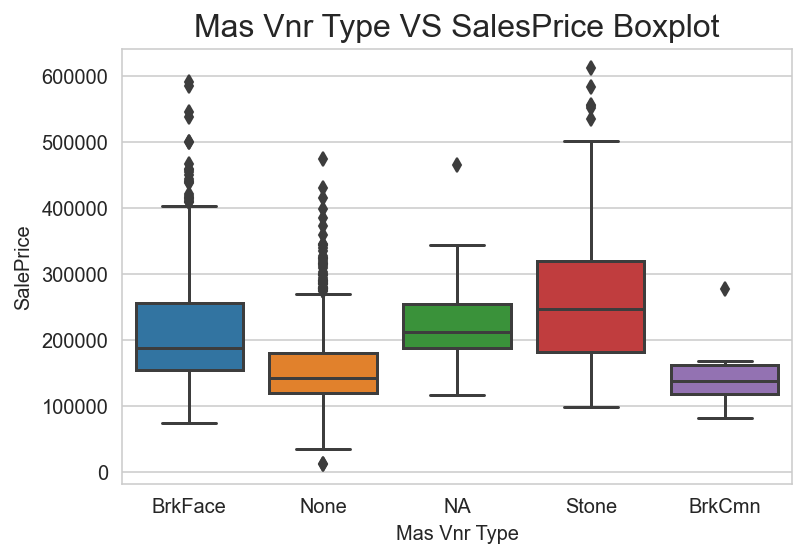

In [88]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Mas Vnr Type', y='SalePrice',data=traindata)
#set_title
ax.set_title("Mas Vnr Type VS SalesPrice Boxplot",fontsize=16)

##### Stone Masonry veneer type tend to have better sales price

Text(0.5, 1.0, 'Exter Qual VS SalesPrice Boxplot')

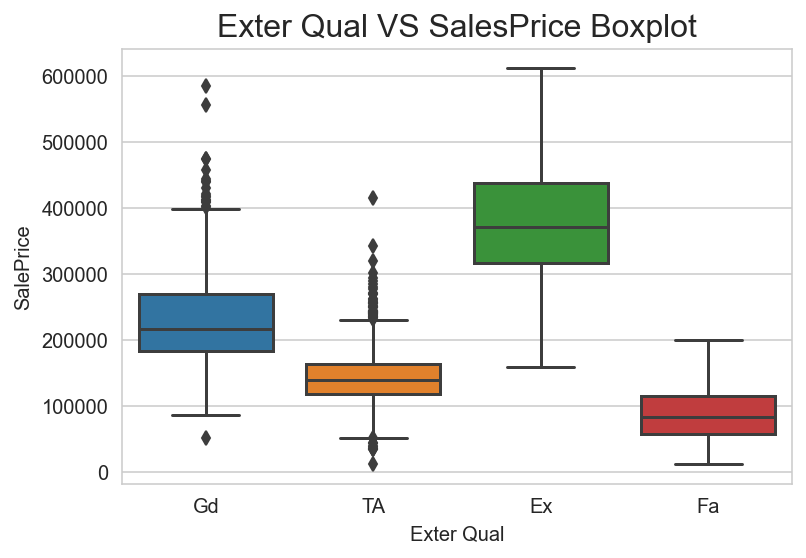

In [89]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Exter Qual', y='SalePrice',data=traindata)
#set_title
ax.set_title("Exter Qual VS SalesPrice Boxplot",fontsize=16)

##### Excellent Evaluates the quality of the material on the exterior tend to have better sales price

Text(0.5, 1.0, 'Exter Cond VS SalesPrice Boxplot')

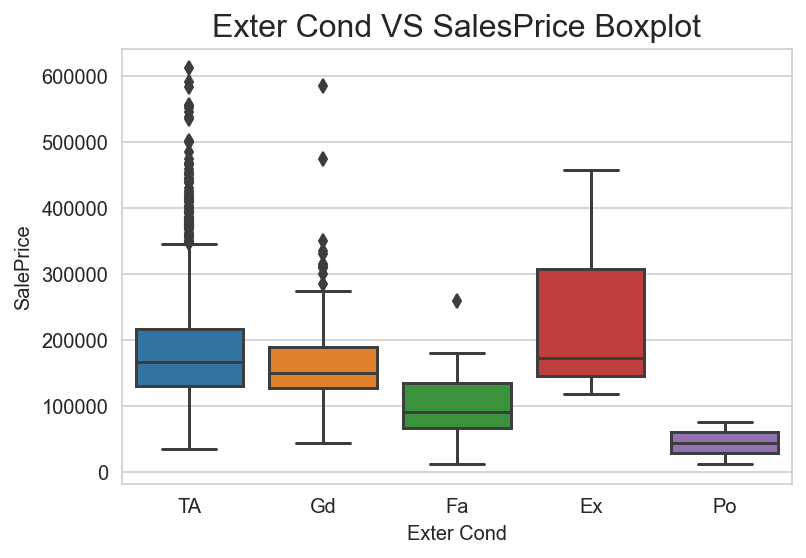

In [90]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Exter Cond', y='SalePrice',data=traindata)
#set_title
ax.set_title("Exter Cond VS SalesPrice Boxplot",fontsize=16)

##### Excellent Evaluates exterior condition tend to have better sales price

Text(0.5, 1.0, 'Foundation VS SalesPrice Boxplot')

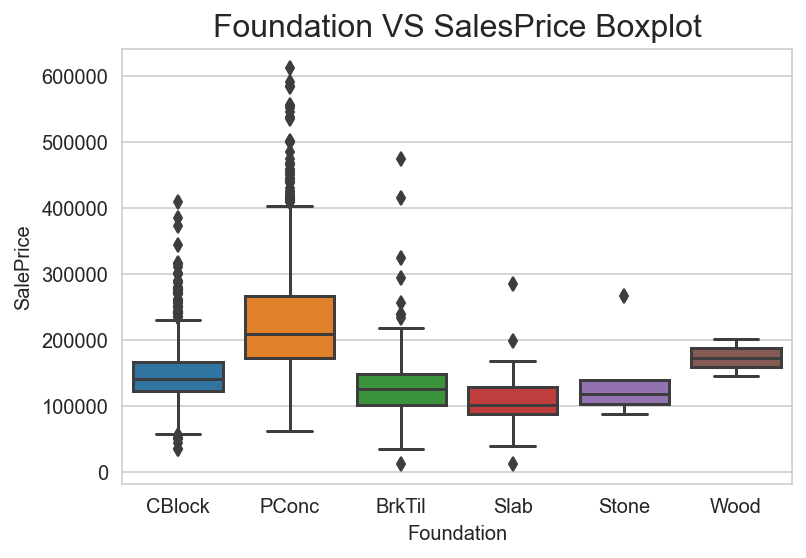

In [91]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Foundation', y='SalePrice',data=traindata)
#set_title
ax.set_title("Foundation VS SalesPrice Boxplot",fontsize=16)

##### Poured Contrete types of fundation tend to have better sales price

Text(0.5, 1.0, 'Bsmt Qual VS SalesPrice Boxplot')

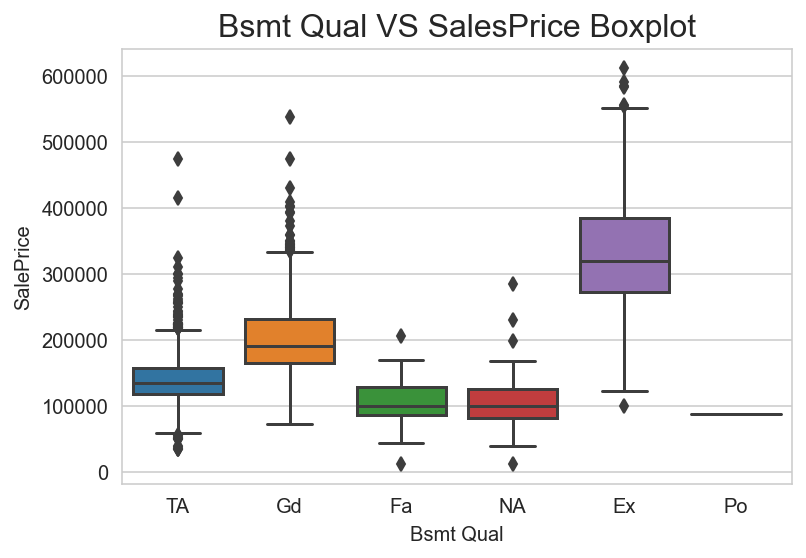

In [92]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Bsmt Qual', y='SalePrice',data=traindata)
#set_title
ax.set_title("Bsmt Qual VS SalesPrice Boxplot",fontsize=16)

##### height of the basement is more than 100 inches tend to have higher sales price

Text(0.5, 1.0, 'Bsmt Exposure VS SalesPrice Boxplot')

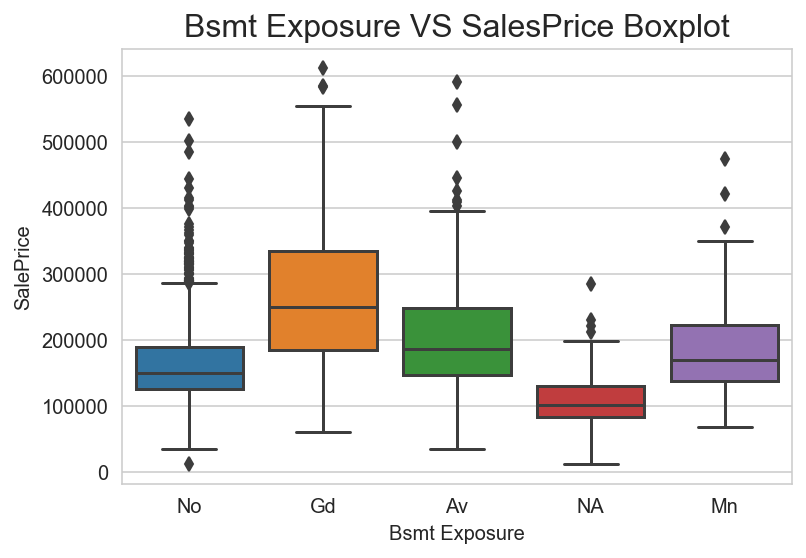

In [93]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Bsmt Exposure', y='SalePrice',data=traindata)
#set_title
ax.set_title("Bsmt Exposure VS SalesPrice Boxplot",fontsize=16)

##### Good general condition of the basement lead to better sales price

Text(0.5, 1.0, 'BsmtFin Type 1 VS SalesPrice Boxplot')

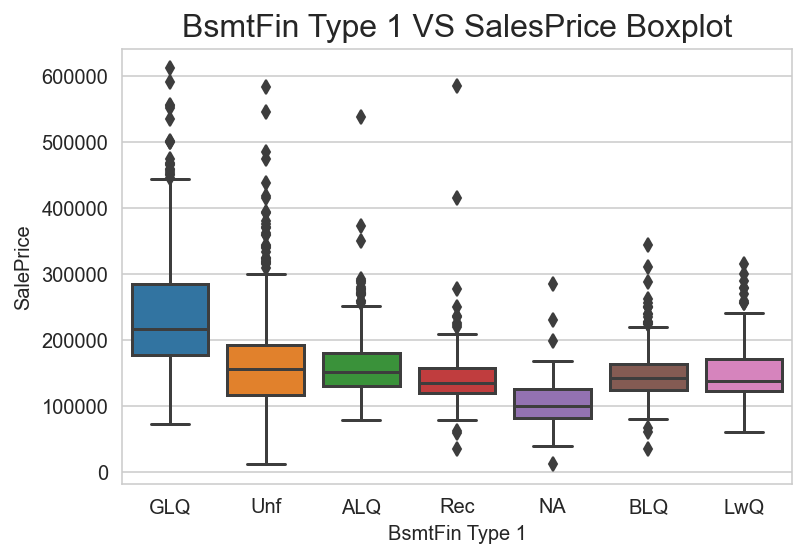

In [94]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='BsmtFin Type 1', y='SalePrice',data=traindata)
#set_title
ax.set_title("BsmtFin Type 1 VS SalesPrice Boxplot",fontsize=16)

##### Good Living Quarters lead to higher sales price

Text(0.5, 1.0, 'BsmtFin Type 2 VS SalesPrice Boxplot')

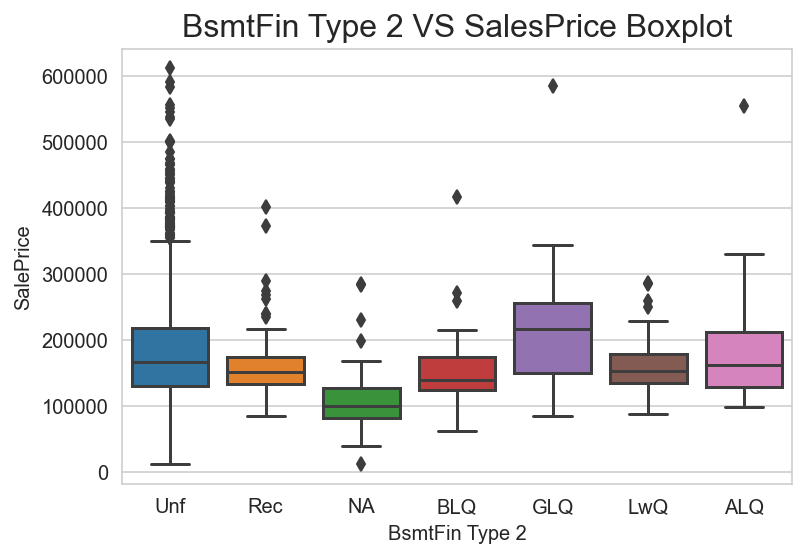

In [95]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='BsmtFin Type 2', y='SalePrice',data=traindata)
#set_title
ax.set_title("BsmtFin Type 2 VS SalesPrice Boxplot",fontsize=16)

##### Good Living Quarters lead to higher sales price

Text(0.5, 1.0, 'Heating VS SalesPrice Boxplot')

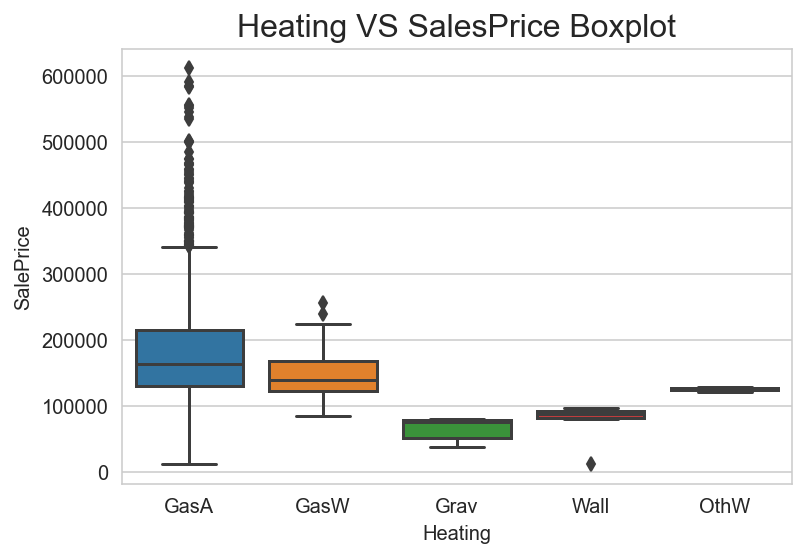

In [96]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Heating', y='SalePrice',data=traindata)
#set_title
ax.set_title("Heating VS SalesPrice Boxplot",fontsize=16)

##### Market perfers Gas forced warm air furnace

Text(0.5, 1.0, 'Heating QC VS SalesPrice Boxplot')

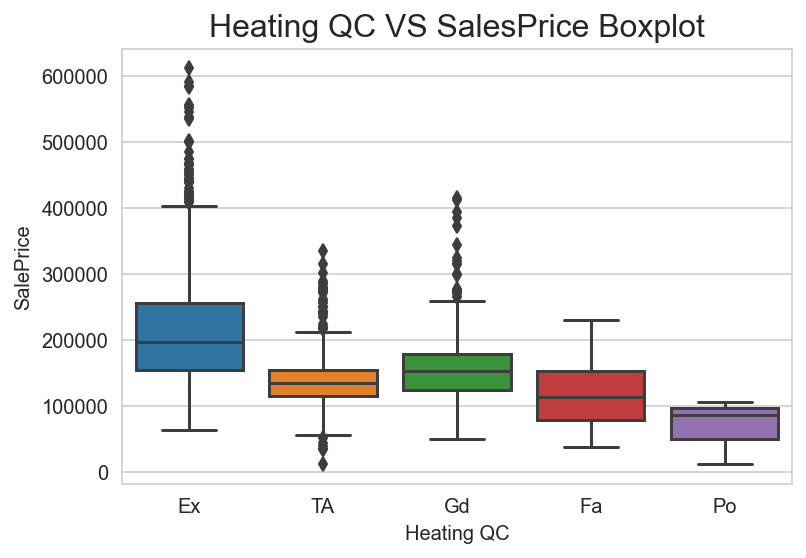

In [97]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Heating QC', y='SalePrice',data=traindata)
#set_title
ax.set_title("Heating QC VS SalesPrice Boxplot",fontsize=16)

##### Excellent Heating quality and condition lead to high sales price

Text(0.5, 1.0, 'Electrical VS SalesPrice Boxplot')

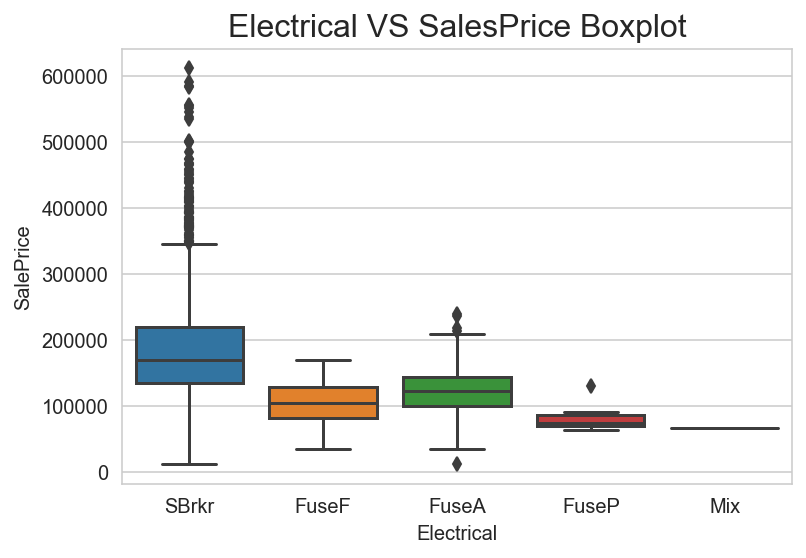

In [98]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Electrical', y='SalePrice',data=traindata)
#set_title
ax.set_title("Electrical VS SalesPrice Boxplot",fontsize=16)

##### Market prefers Standard Circuit Breakers & Romex for Electrical system

Text(0.5, 1.0, 'Kitchen Qual VS SalesPrice Boxplot')

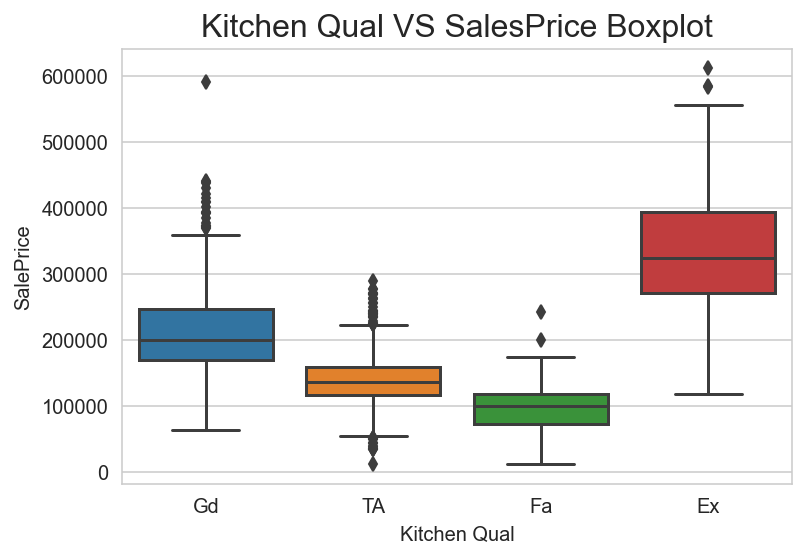

In [99]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Kitchen Qual', y='SalePrice',data=traindata)
#set_title
ax.set_title("Kitchen Qual VS SalesPrice Boxplot",fontsize=16)

##### Excellent Kitchen quality lead to high sales price

Text(0.5, 1.0, 'Functional VS SalesPrice Boxplot')

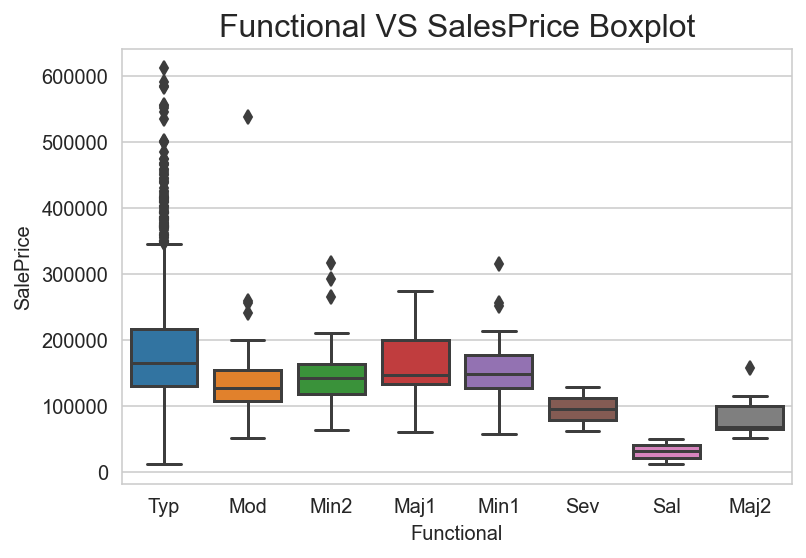

In [100]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Functional', y='SalePrice',data=traindata)
#set_titleFunctional
ax.set_title("Functional VS SalesPrice Boxplot",fontsize=16)

##### Typical Functionality House tend to have better sales price

Text(0.5, 1.0, 'Fireplace Qu VS SalesPrice Boxplot')

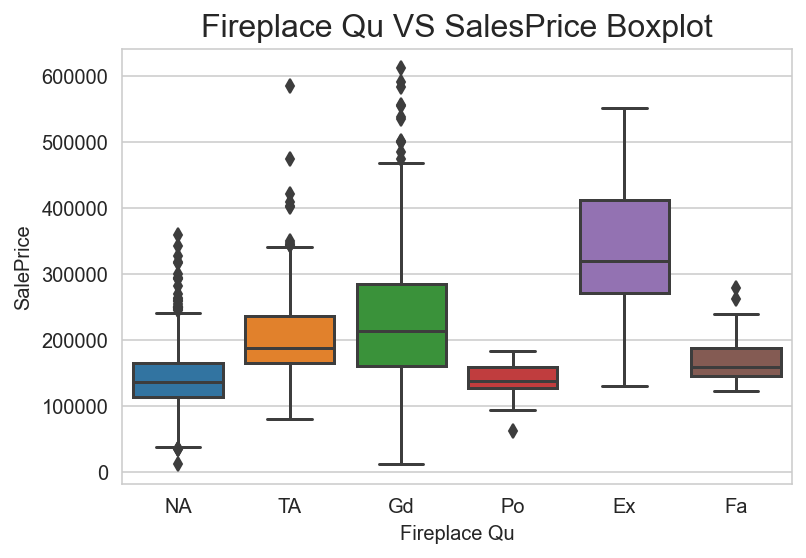

In [101]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Fireplace Qu', y='SalePrice',data=traindata)
#set_title
ax.set_title("Fireplace Qu VS SalesPrice Boxplot",fontsize=16)

##### Excellent Fireplace quality leads to high sales price

Text(0.5, 1.0, 'Garage Type VS SalesPrice Boxplot')

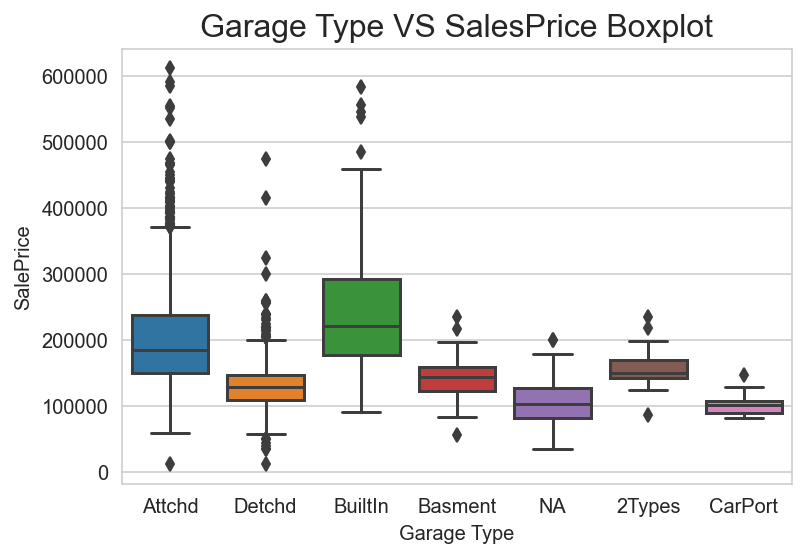

In [102]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Garage Type', y='SalePrice',data=traindata)
#set_title
ax.set_title("Garage Type VS SalesPrice Boxplot",fontsize=16)

##### Built-In Garage leads to high sales price

Text(0.5, 1.0, 'Garage Finish VS SalesPrice Boxplot')

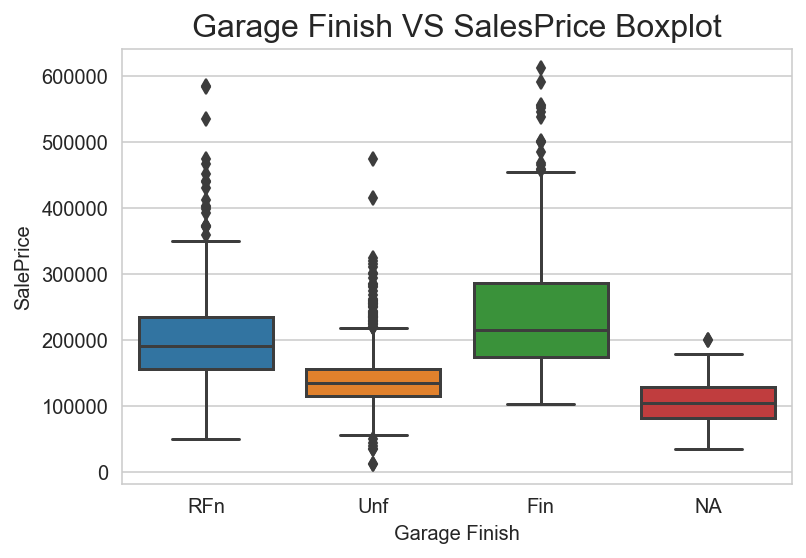

In [103]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Garage Finish', y='SalePrice',data=traindata)
#set_title
ax.set_title("Garage Finish VS SalesPrice Boxplot",fontsize=16)

##### Interior finished of the garage will lead the high sales price

Text(0.5, 1.0, 'Garage Qual VS SalesPrice Boxplot')

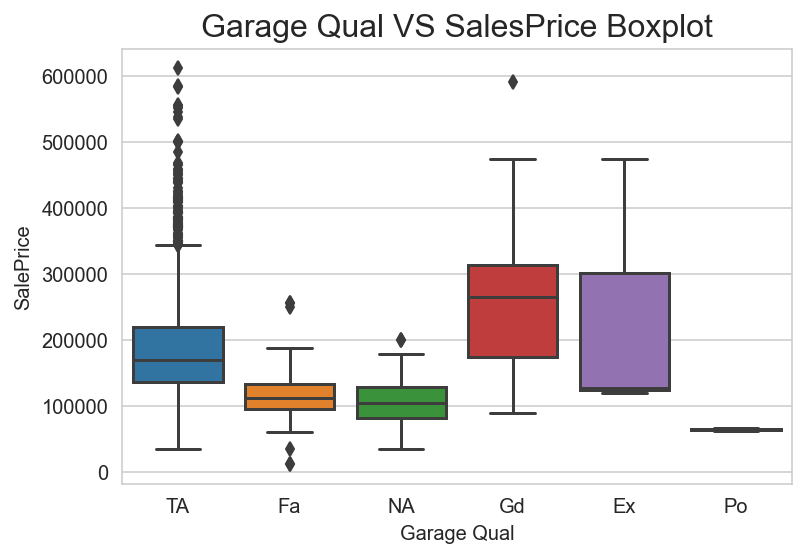

In [104]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Garage Qual', y='SalePrice',data=traindata)
#set_title
ax.set_title("Garage Qual VS SalesPrice Boxplot",fontsize=16)

##### Good and excellent Garage quality tend to have high sales price

Text(0.5, 1.0, 'Garage Cond VS SalesPrice Boxplot')

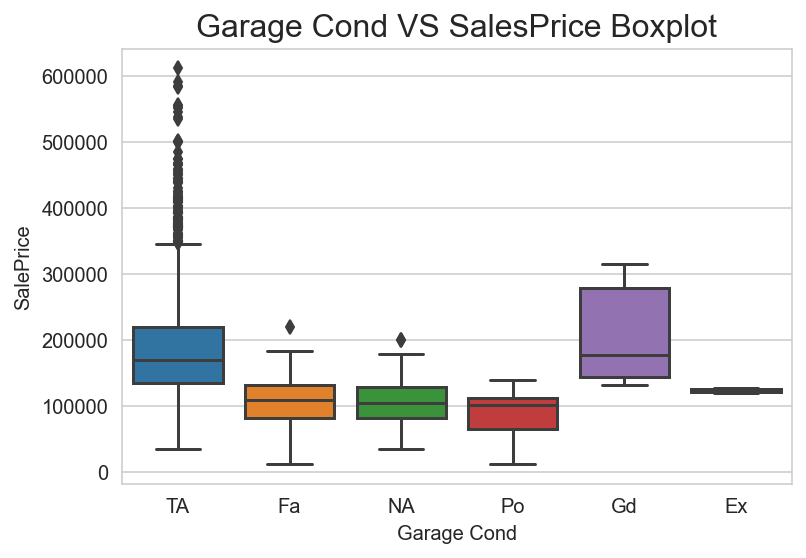

In [105]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Garage Cond', y='SalePrice',data=traindata)
#set_title
ax.set_title("Garage Cond VS SalesPrice Boxplot",fontsize=16)

##### Good Garage Condition tend to have better sales price

Text(0.5, 1.0, 'Paved Drive VS SalesPrice Boxplot')

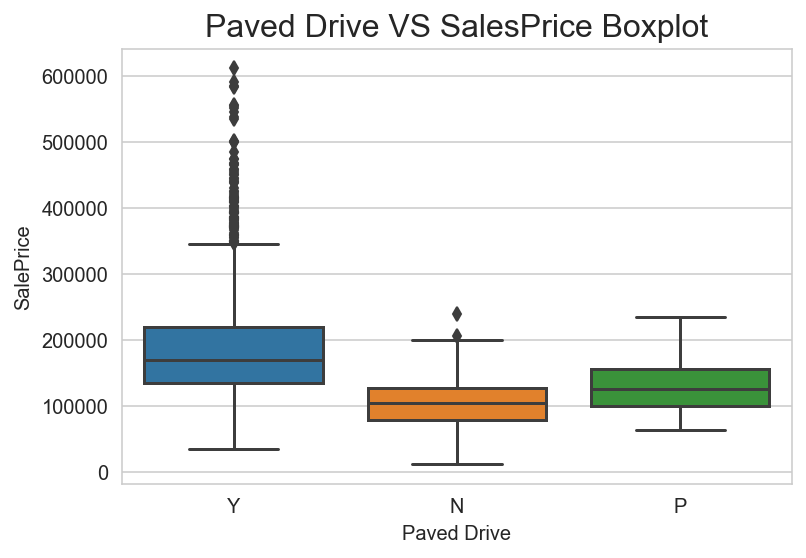

In [106]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Paved Drive', y='SalePrice',data=traindata)
#set_title
ax.set_title("Paved Drive VS SalesPrice Boxplot",fontsize=16)

##### Paved driveway near Pave will lead to higher sales price

Text(0.5, 1.0, 'Misc Feature VS SalesPrice Boxplot')

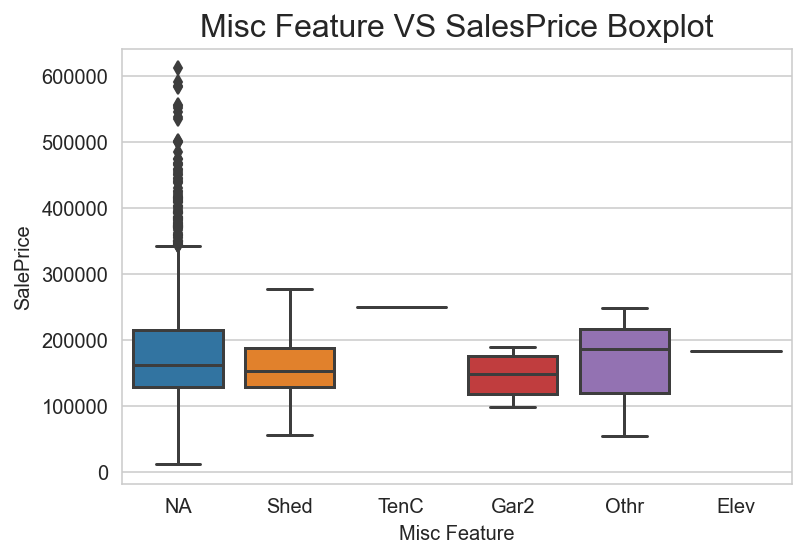

In [107]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Misc Feature', y='SalePrice',data=traindata)
#set_title
ax.set_title("Misc Feature VS SalesPrice Boxplot",fontsize=16)

Text(0.5, 1.0, 'Fence VS SalesPrice Boxplot')

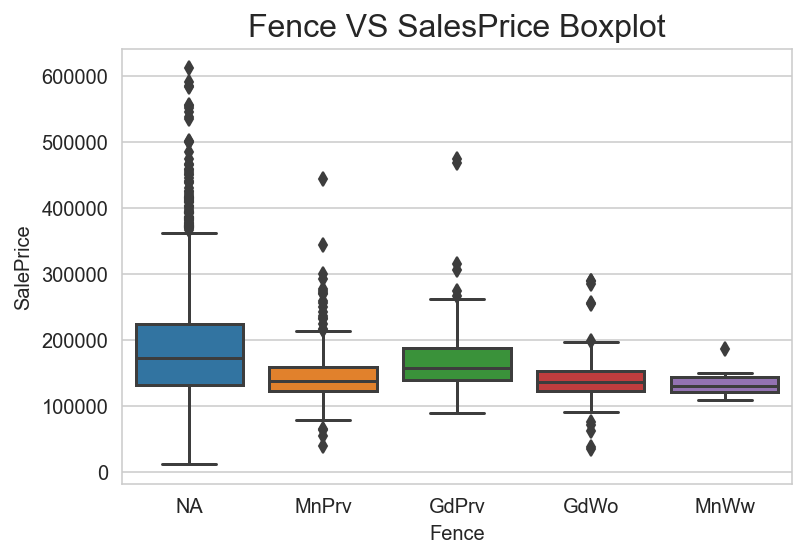

In [108]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Fence', y='SalePrice',data=traindata)
#set_title
ax.set_title("Fence VS SalesPrice Boxplot",fontsize=16)

Text(0.5, 1.0, 'Sale Type VS SalesPrice Boxplot')

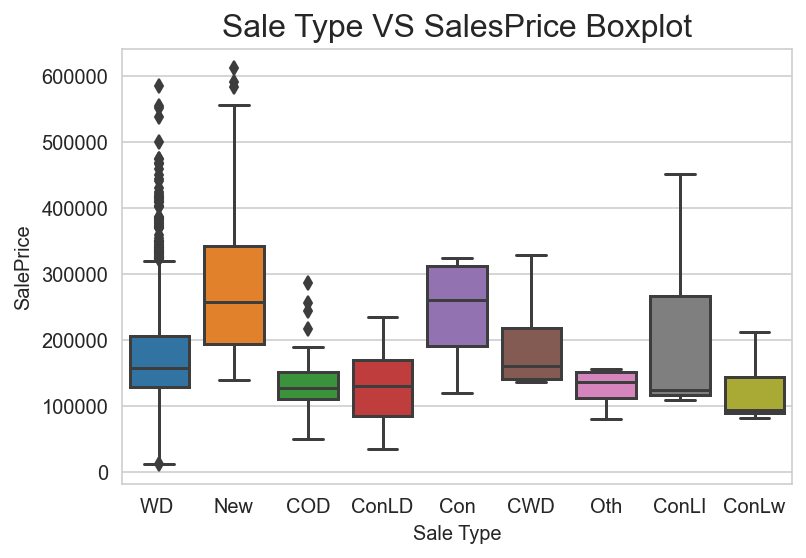

In [109]:
#unpack this tuple into the variables
ax = plt.axes()
#plot the graphy
sns.boxplot(x='Sale Type', y='SalePrice',data=traindata)
#set_title
ax.set_title("Sale Type VS SalesPrice Boxplot",fontsize=16)

##### Buyers perfer to buy the Home just constructed or under the Contract 15% Down payment regular terms

#### With 81 explanatory variables describing every aspect of residential homes in Ames, Iowa, and quite many missing and outliers in the datasets. I spent a lot of time understanding all the features and replacing the missing values with another a suitable amount instead. For the outliers, I decided to keep them as the data number is not very large <2500. The outlier's removal affects the model significantly, and none of the outliers are identified as causing by entry/measuring errors.
 
#### I also exploratory the relationships of every variable to the target "SalePrice," We can see which variables have a massive impact on SalePrice like Total Bsmt Area, Year built, Overall Qual. We also can see how a single variable will affect the SalePrice like house with Excellent Kitchen Quality tend to have better SalePrice and home with Neighborhood in Northridge, Stone Brook, and Northridge Heights tend to have high sales price.

#### However, when bringing all the variables together, for example, what is the possible sale price for a house with a Neighborhood in Northridge but low kitchen Quality?, there is no clue for the answers. Thus, we will develop a model to predict the price in such situations.

#### 14. Save the clean data to csv file

In [110]:
#save the traindata
traindata.to_csv(r'C:\Users\User\materials\project_2\datasets\traindata_clean.csv', index=False)

In [111]:
#save the testdata
testdata.to_csv(r'C:\Users\User\materials\project_2\datasets\testdata_clean.csv', index=False)

#### 15. Creat a data dictionary

|Features                    | Type    |Description
|:---------------------------|:--------|:----------------------------------------------------------------------------------------
| MS SubClass                | object  |Identifies the type of dwelling involved in the sale
| MS Zoning                  | object  |Identifies the general zoning classification of the sale
| Lot Frontage               | float64 |Linear feet of street connected to property
| Lot Area                   | int64   |Lot Area (Continuous): Lot size in square feet
| Street                     | object  |Type of road access to property
| Alley                      | object  |Type of alley access to property
| Lot Shape                  | object  |General shape of property
| Land Contour               | object  |Flatness of the property
| Utilities                  | object  |Type of utilities available
| Lot Config                 | object  |Lot configuration
| Land Slope                 | object  |Slope of property
| Neighborhood               | object  |Physical locations within Ames city limits (map available)
| Condition 1                | object  |Proximity to various conditions
| Condition 2                | object  |Proximity to various conditions
| Bldg Type                  | object  |Type of dwelling
| House Style                | object  |Style of dwelling
| Overall Qual               | int64   |Rates the overall material and finish of the house
| Overall Cond               | int64   |Rates the overall condition of the house
| Year Built                 | int64   |Original construction date
| Year Remod/Add             | int64   |Remodel date (same as construction date if no remodeling or additions)
| Roof Style                 | object  |Type of roof
| Roof Matl                  | object  |Roof material
| Exterior 1st               | object  |Exterior covering on house
| Exterior 2nd               | object  |Exterior covering on house
| Mas Vnr Type               | object  |Masonry veneer type
| Mas Vnr Area               | float64 |Masonry veneer area in square feet
| Exter Qual                 | object  |Evaluates the quality of the material on the exterior
| Exter Cond                 | object  |Evaluates the present condition of the material on the exterio
| Foundation                 | object  |Type of foundation
| Bsmt Qual                  | object  |Evaluates the height of the basement
| Bsmt Cond                  | object  |Evaluates the general condition of the basement
| Bsmt Exposure              | object  |Refers to walkout or garden level walls
| BsmtFin Type 1             | object  |Rating of basement finished area
| BsmtFin SF 1               | float64 |Type 1 finished square feet
| BsmtFin Type 2             | object  |Rating of basement finished area (if multiple types)
| BsmtFin SF 2               | float64 |Type 2 finished square feet
| Bsmt Unf SF                | float64 |Unfinished square feet of basement area
| Total Bsmt SF              | float64 |Total square feet of basement area
| Heating                    | object  |Type of heating
| Heating QC                 | object  |Heating quality and condition
| Central Air                | int64   |Central air conditioning
| Electrical                 | object  |Electrical system
| 1st Flr SF                 | int64   |First Floor square feet
| 2nd Flr SF                 | int64   |Second floor square feet
| Low Qual Fin SF            | int64   |Low quality finished square feet (all floors)
| Gr Liv Area                | int64   |Above grade (ground) living area square feet
| Bsmt Full Bath             | float64 |Basement full bathrooms
| Bsmt Half Bath             | float64 |Basement half bathrooms
| Full Bath                  | int64   |Full bathrooms above grade
| Half Bath                  | int64   |Half baths above grade
| Bedroom AbvGr              | int64   |Bedrooms above grade (does NOT include basement bedrooms)
| Kitchen AbvGr              | int64   |Kitchens above grade
| Kitchen Qual               | object  |Kitchen quality
| TotRms AbvGrd              | int64   |Total rooms above grade (does not include bathrooms)
| Functional                 | object  |Home functionality (Assume typical unless deductions are warranted)
| Fireplaces                 | int64   |Number of fireplaces
| Fireplace Qu               | object  |Fireplace quality
| Garage Type                | object  |Garage location
| Garage Finish              | object  |Interior finish of the garage
| Garage Cars                | float64 |Size of garage in car capacity
| Garage Area                | float64 |Size of garage in square feet
| Garage Qual                | object  |Garage quality
| Garage Cond                | object  |Garage condition
| Paved Drive                | object  |Paved driveway
| Wood Deck SF               | int64   |Wood deck area in square feet
| Open Porch SF              | int64   |Open porch area in square feet
| Enclosed Porch             | int64   |Enclosed porch area in square feet
| 3Ssn Porch                 | int64   |Three season porch area in square feet
| Screen Porch               | int64   |Screen porch area in square feet
| Pool Area                  | int64   |Pool area in square feet
| Pool QC                    | object  |Pool quality
| Fence                      | object  |Fence quality
| Misc Feature               | object  |Miscellaneous feature not covered in other categories
| Misc Val                   | int64   |$Value of miscellaneous feature
| Mo Sold                    | object  |Month Sold (MM)
| Yr Sold                    | object  |Year Sold (YYYY)
| Sale Type                  | object  |Type of sale
| SalePrice                  | int64   |Sale price
| Lot Area * Frontage        | float64 |combined feature
| Year Built* Year Remod/Add | int64   |combined feature